# Project: Investigate a Dataset - [tmdb-movies.csv]

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

### Dataset Description

This dataset is a collection of movies from IMDB from the 1960's to 2015. This collection of movies has genres like action, adventure, drama, and so on.<b>

The columns of the dataset are listed below:<br>
**id**: The unique number that identifies each row or record <br>
**imdb_id**: The unique number assigned by IMDB<br>
**popularity**: This is a number that represents the popularity of the movie among people<br>
**budget**: This is the amount of money spent in making the movie in the year it was made<br>
**revenue**: This is the amount of money made from sales of the movie<br>
**original_title**: This is the title of the movie<br>
**cast**: This gives us the names of the actors and actresses<br>
**homepage**: This gives the url of the movie<br>
**director**: This gives the name(s) of the director(s) of the movies<br>
**tagline**: This is a catch phrase that is associated with the movie<br>
**keywords**: This is a set of words that are associated with the movie<br>
**overview**: This gives the synopsis of the movie<br>
**runtime**: This gives the total time the movie runs for<br>
**genres**: This column tells us what genre the movies are; drama, action, adventure, and so on.<br>
**production_companies**: This gives the production company or companies responsible for producing the movie<br>
**release_date**: This gives the date when the movie was released<br>
**vote_count**: This gives the total number of people that voted for or against the movie in IMDB <br>
**vote_average**: This gives the average rating of the movie out of 10.0<br>
**release_year**: This gives the year the movie was released<br>
**budget_adj**: This gives the budget for making the movie adjusted for inflation<br>
**revenue_adj**: This gives the revenue made from movie sales, adjusted for inflation<br>



### Question(s) for Analysis
1.0 Relationship between budget and popularity.<br>
1.1 Movies that had highest revenue for each year and what year was the most revenue made on movies.<br>
1.2 Highest grossing movies for each year<br>
1.3 The most expensive movie made each year<br>
1.4 Is there any correlation between release date [period] and revenue?<br>
1.5 The season most movies are released<br>

In [1]:
#Importing the relevant packages and modules

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import ast
import sys
import json
sys.path.append(r"./txt_to_json.py")

from txt_to_json import txt_to_json_converter


sns.set()
%matplotlib inline

In [2]:
#Read the dataset

data = pd.read_csv("tmdb-movies.csv", parse_dates=['release_date'])

#Use parse_dates to help convert release date colume to a datetime column

data.head(3)

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,2015-06-09,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,2015-05-13,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,2015-03-18,2480,6.3,2015,1.012000e+08,2.716190e+08


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   id                    10866 non-null  int64         
 1   imdb_id               10856 non-null  object        
 2   popularity            10866 non-null  float64       
 3   budget                10866 non-null  int64         
 4   revenue               10866 non-null  int64         
 5   original_title        10866 non-null  object        
 6   cast                  10790 non-null  object        
 7   homepage              2936 non-null   object        
 8   director              10822 non-null  object        
 9   tagline               8042 non-null   object        
 10  keywords              9373 non-null   object        
 11  overview              10862 non-null  object        
 12  runtime               10866 non-null  int64         
 13  genres          

In [4]:
data.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.000000,10866.000000,1.086600e+04,1.086600e+04,10866.000000,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04
mean,66064.177434,0.646441,1.462570e+07,3.982332e+07,102.070863,217.389748,5.974922,2001.322658,1.755104e+07,5.136436e+07
std,92130.136561,1.000185,3.091321e+07,1.170035e+08,31.381405,575.619058,0.935142,12.812941,3.430616e+07,1.446325e+08
min,5.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10596.250000,0.207583,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20669.000000,0.383856,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,75610.000000,0.713817,1.500000e+07,2.400000e+07,111.000000,145.750000,6.600000,2011.000000,2.085325e+07,3.369710e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


## Brief Insight ##

### About the data ##
1. At first glance, there is a big skew in budget because of the min, 25%, 50% values compared with the 75% and max values, implying that there are relatively fewer big budget movies in the dataset

2. On average movies last about 99-102 minutes long, judging by the mean and median values. The column distribution seems a fairly symmetrical.

3. Most movies in the dataset recieved a rating of around 5-7 out of 10.

4. There are fewer movies from earlier than 1995 and majority of the movies are within a 20 year span starting from 1995


### More info ###
1. There are a total of 10866 rows in the dataset.

2. There are some missing values in the following columns:
<br>Cast: 10790
<br>homepage: 2936 (drop)
<br>Director: 10822
<br>tagline: 8042 (drop)
<br>keywords: 9373 (drop)
<br>production companies: 9836

(*Note*:The values with "drop" will be dropped from the date because they are not needed in the analysis) 

<a id='wrangling'></a>
## Data Cleaning


The Data Cleaning process will be done in the following steps:

<br>
1. Drop Homepage, tagline, keyword, budget, revenue, overview. The 'budget' and 'revenue' columns are dropped because
they are have not been adjusted for inflation unlike 'budget_adj' and 'revenue_adj'<br>
2. Deal with missing values:

    2.1 Directors: check which movies have no directors and see if you can find the directors else input unknown director
    2.2 Genres: check which movies have  no genres and see if you can input them else input "unknown genres"
    2.3 Production companies: "unknown production company" 
    2.4 Dealing with original_titles with bad names. Remove unwanted characters.


Step 1: 

Drop Homepage, tagline, keyword, budget, revenue, overview. The 'budget' and 'revenue' columns are dropped because they are have not been adjusted for inflation unlike 'budget_adj' and 'revenue_adj'

In [5]:
#Data Cleaning
#Step 1:Drop Homepage, tagline, keyword, budget, revenue, overview

df = data.drop(['homepage', 'tagline', 'keywords', 'budget', 'revenue', 'overview'], axis = 1)
df.head(2)

,id,imdb_id,popularity,original_title,cast,director,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,2015-06-09,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,2015-05-13,6185,7.1,2015,1.379999e+08,3.481613e+08


Step 2: Dealing with missing values

2.1:
Directors

In [6]:
#Step 2: Dealing with missing values:
#Step 2.1: Directors


#Getting the number of null values in the director column

null_directors = df['director'].isnull().sum()
print(f"There are {null_directors} null values for director column")

There are 44 null values for director column


In [7]:
#To rectify this problem, I have taken the liberty of finding the director names missing in the dataset. I have stored them in 
#dictionary format in a .txt file in the working directory

#I have taken this .txt file and converted it to a json file using the txt_to_json_converter method imported from the 
#txt_to_json module I created

#I have read the json file in this cell and used the ast module to expose the dictionary element from the output string

#I have wrapped this whole operation in a function so that I can use it multiple times.

#The dictionary values is shown below:


def dict_from_txt(txtfilename):
    """
    This function takes the text file provided containing the missing names and converts it into a dictionary
    It takes in only one argument 'txtfilename' which is the name of .txt file
    
    It uses the imported function txt_to_json_converter() to convert the .txt file into a json file and this json file
    is then converted to a dictionary.
    
    """
    txt_to_json_converter(f"{txtfilename}")
    
    with open(f'{txtfilename[:-4]}.json', 'r') as json_file:
        contents = json.loads(json_file.read())
        #print(contents)
        json_file.close()
    dic = ast.literal_eval(contents[0])
    return dic


def declare_missing_vals(dataframe_object, *args ):
    """
    The purpose of this function is to simply declare the missing values in a particular column or list of columns
    It also returns this list of columns with nulls
    """
    null_cols_list = []
    for column_name in args:
        null_cols = dataframe_object[column_name].isnull().sum()
        print(f"There are {null_cols} null values for {column_name} column")
        null_cols_list.append({column_name : null_cols})
    return null_cols_list


def full_null_listing(dataframe_object, column_name, *args):
    """
    This returns the columns of the dataframe where there are missing values
    
    """
    declare_missing_vals(df, column_name)
    null_listing = dataframe_object[dataframe_object[column_name].isnull()][list(args)]
    return null_listing


def fill_missing_vals(column_name, by_column, dataframe_object, txtfile = None):
    """
    This function helps to fill the missing values using either 'unknown' or the dictionary created in the
    txt_to_json_converter function.
    
    """
    if by_column.startswith("unknown"):
        df[column_name] = df[column_name].fillna(by_column.lower())
        declare_missing_vals(dataframe_object, column_name)
        
    else:
        dic = dict_from_txt(txtfile)
        dataframe_object[column_name] = dataframe_object[column_name].fillna(dataframe_object[by_column].map(dic))
        declare_missing_vals(dataframe_object, column_name)

    
    
    
    #df["director"] = df["director"].fillna(df["original_title"].map(director_dic))
    #fill_missing_vals("unknown_movie_directors.txt", "director", "original_title", df)

#director_dic = dict_from_txt("unknown_movie_directors.txt")

In [8]:
#cols_with_unknowns= ['director', 'genres', 'cast', 'production_companies']

#for col in cols_with_unknowns:
 #   declare_missing_vals(col, df)

declare_missing_vals(df, "director", "genres", "cast", "production_companies");

There are 44 null values for director column
There are 23 null values for genres column
There are 76 null values for cast column
There are 1030 null values for production_companies column


In [9]:
#Try to get the movie names and their directors:
#df[df['director'].isnull()][['original_title', 'release_date']]
full_null_listing(df, "director", "original_title", "release_date", "genres")

There are 44 null values for director column


,original_title,release_date,genres
532,Iliza Shlesinger: Freezing Hot,2015-01-23,Comedy
548,Sense8: Creating the World,2015-08-10,Documentary|Science Fiction
556,With This Ring,2015-01-24,Comedy|Romance
1032,Marvel Studios: Assembling a Universe,2014-03-18,TV Movie|Documentary
1054,Unlocking Sherlock,2014-01-19,TV Movie|Documentary
1203,Free to Play,2014-03-19,Documentary
1241,Dance-Off,2014-01-01,Romance|Music|Comedy
1288,Top Gear: The Perfect Road Trip 2,2014-11-17,Documentary
1852,The Diary of Anne Frank,2009-01-09,Drama
1872,Paa,2009-12-04,Drama|Family|Foreign


In [10]:
#Using fillna to map the values from the dictionary to the empty values in the director column

fill_missing_vals("director", "original_title", df, "unknown_movie_directors.txt");
#df["director"] = df["director"].fillna(df["original_title"].map(director_dic))

#declare_missing_vals("director", df);
#null_directors = df['director'].isnull().sum()
#print(f"There are {null_directors} null values for director column")

There are 7 null values for director column


In [11]:
#Replacing the 7 remaining null values with "Unknown director"

fill_missing_vals("director", "unknown director", df)
#df["director"] = df["director"].fillna("unknown director")

#declare_missing_vals("director", df);
#null_directors = df['director'].isnull().sum()
#print(f"There are {null_directors} null values for director column")

There are 0 null values for director column


In [12]:
df.head()

,id,imdb_id,popularity,original_title,cast,director,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,2015-06-09,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,2015-05-13,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,2015-03-18,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,2015-12-15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,James Wan,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,2015-04-01,2947,7.3,2015,1.747999e+08,1.385749e+09


Step 2: Dealing with missing values

Step 2.2: Genres

In [13]:
#Step 2: Dealing with missing values:
#Step 2.2: Genres

full_null_listing(df, "genres", "original_title", "release_date")
#declare_missing_vals("genres", df);
#null_genres = df['genres'].isnull().sum()
#print(f"There are {null_genres} null values for genre column")

There are 23 null values for genres column


,original_title,release_date
424,Belli di papÃ,2015-10-29
620,All Hallows' Eve 2,2015-10-06
997,Star Wars Rebels: Spark of Rebellion,2014-10-03
1712,Prayers for Bobby,2009-02-27
1897,Jonas Brothers: The Concert Experience,2009-02-27
2370,Freshman Father,2010-06-05
2376,Doctor Who: A Christmas Carol,2010-12-25
2853,Vizontele,2001-02-02
3279,ì•„ê¸°ì™€ ë‚˜,2008-08-13
4547,London 2012 Olympic Opening Ceremony: Isles of...,2012-07-27


In [14]:
genre_dict = dict_from_txt("unknown_genres.txt")


In [15]:
#Using fillna to map the values from the dictionary to the empty values in the genre column

fill_missing_vals("genres", "original_title", df, "unknown_genres.txt");

#df["genres"] = df["genres"].fillna(df["original_title"].map(genre_dict))

#declare_missing_vals("genres", df);
#null_genres = df['genres'].isnull().sum()
#print(f"There are {null_genres} null values for genre column")

There are 4 null values for genres column


In [16]:
#Replacing the 7 remaining null values with "Unknown genre"

fill_missing_vals("director", "unknown genre", df);

#df["genres"] = df["genres"].fillna("unknown genre")

#declare_missing_vals("genres", df);
#null_genres = df['genres'].isnull().sum()
#print(f"There are {null_genres} null values for genre column")

There are 0 null values for director column


In [17]:
#declare_missing_vals("cast", df);
full_null_listing(df, "cast", "original_title", "release_date")
#null_cast = df['cast'].isnull().sum()
#print(f"There are {null_cast} null values for cast column")

There are 76 null values for cast column


,original_title,release_date
371,Sanjay's Super Team,2015-11-25
441,Winter on Fire: Ukraine's Fight for Freedom,2015-10-09
465,Bitter Lake,2015-01-24
536,A Faster Horse,2015-10-08
538,The Mask You Live In,2015-01-01
...,...,...
9677,Red's Dream,1987-08-17
9755,The Big Shave,2068-01-01
10434,Six Men Getting Sick,2067-01-01
10550,Luxo Jr.,1986-08-17


In [18]:
cast_dict = dict_from_txt("unknown_cast.txt")

In [19]:
len(cast_dict)

60

In [20]:
fill_missing_vals("cast", "original_title", df, "unknown_cast.txt");


#df["cast"] = df["cast"].fillna(df["original_title"].map(cast_dict))


#null_cast = df['cast'].isnull().sum()
#print(f"There are {null_cast} null values for cast column")

There are 16 null values for cast column


In [21]:
fill_missing_vals("cast", "unknown cast", df);

There are 0 null values for cast column


Step 2: Dealing with missing values

Step 2.3 Production companies: "unknown production company"

In [22]:
full_null_listing(df, "production_companies", "original_title", "release_date")

#null_company = df['production_companies'].isnull().sum()
#print(f"There are {null_company} null values for production companies column")

There are 1030 null values for production_companies column


,original_title,release_date
228,Racing Extinction,2015-01-24
259,Crown for Christmas,2015-11-27
295,12 Gifts of Christmas,2015-11-26
298,The Girl in the Photographs,2015-09-14
328,Advantageous,2015-06-23
...,...,...
10804,Interiors,1978-08-02
10806,Gates of Heaven,1978-10-01
10816,The Rutles: All You Need Is Cash,1978-03-22
10842,Winnie the Pooh and the Honey Tree,2066-01-01


In [23]:
#Filling all null values in the production companies column with "unknown company"

fill_missing_vals("production_companies", "unknown company", df);
#df['production_companies'] = df['production_companies'].fillna('unknown_company')

#null_company = df['production_companies'].isnull().sum()
#print(f"There are {null_company} null values for production companies column")

There are 0 null values for production_companies column


Step 2: Dealing with missing values

Step 2.4: Dealing with original_titles with bad names.

In [24]:
df['original_title'] = df['original_title'].str.replace('[^a-zA-Z0-9 ]', '')

df[~df['original_title'].str.isalpha()]

C:\Users\olanr\AppData\Local\Temp\ipykernel_18696\1145769682.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  df['original_title'] = df['original_title'].str.replace('[^a-zA-Z0-9 ]', '')


,id,imdb_id,popularity,original_title,cast,director,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,2015-06-09,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,Mad Max Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,2015-05-13,6185,7.1,2015,1.379999e+08,3.481613e+08
3,140607,tt2488496,11.173104,Star Wars The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,2015-12-15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,James Wan,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,2015-04-01,2947,7.3,2015,1.747999e+08,1.385749e+09
5,281957,tt1663202,9.110700,The Revenant,Leonardo DiCaprio|Tom Hardy|Will Poulter|Domhn...,Alejandro GonzÃ¡lez IÃ±Ã¡rritu,156,Western|Drama|Adventure|Thriller,Regency Enterprises|Appian Way|CatchPlay|Anony...,2015-12-25,3929,7.2,2015,1.241999e+08,4.903142e+08
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10861,21,tt0060371,0.080598,The Endless Summer,Michael Hynson|Robert August|Lord 'Tally Ho' B...,Bruce Brown,95,Documentary,Bruce Brown Films,2066-06-15,11,7.4,1966,0.000000e+00,0.000000e+00
10862,20379,tt0060472,0.065543,Grand Prix,James Garner|Eva Marie Saint|Yves Montand|Tosh...,John Frankenheimer,176,Action|Adventure|Drama,Cherokee Productions|Joel Productions|Douglas ...,2066-12-21,20,5.7,1966,0.000000e+00,0.000000e+00
10863,39768,tt0060161,0.065141,Beregis Avtomobilya,Innokentiy Smoktunovskiy|Oleg Efremov|Georgi Z...,Eldar Ryazanov,94,Mystery|Comedy,Mosfilm,2066-01-01,11,6.5,1966,0.000000e+00,0.000000e+00
10864,21449,tt0061177,0.064317,Whats Up Tiger Lily,Tatsuya Mihashi|Akiko Wakabayashi|Mie Hama|Joh...,Woody Allen,80,Action|Comedy,Benedict Pictures Corp.,2066-11-02,22,5.4,1966,0.000000e+00,0.000000e+00


In [25]:
#Replacing non-english characters with a blank in the original_title column

df['original_title'] = df['original_title'].str.replace('[^a-zA-Z0-9 ]', '')


C:\Users\olanr\AppData\Local\Temp\ipykernel_18696\2014274345.py:3: FutureWarning: The default value of regex will change from True to False in a future version.
  df['original_title'] = df['original_title'].str.replace('[^a-zA-Z0-9 ]', '')


In [26]:
df['cast'] = df['cast'].str.replace('[^a-zA-Z0-9| ]', '')

C:\Users\olanr\AppData\Local\Temp\ipykernel_18696\2640561699.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  df['cast'] = df['cast'].str.replace('[^a-zA-Z0-9| ]', '')


<a id='wrangling'></a>
## Data Wrangling


Next is the data wrangling process. This process consists of the following steps:

1. Rename budget_adj to budget and revenue_adj to revenue.
2. Create grossing and percent_grossing column. The grossing column will show the profit made off the movies, while 
percent_grossing will show by what factor the initial budget was recouped
3. Put all string values to lower case.
4. Break cast, director, genres, and production_companies into fragments.
5. Deal with dates:
<br>
- Check if release date year == release year: This is to ensure consistency of the data
<br>
- Create a month column
<br>
- Create a day column
<br>
- Create a quarter column
<br>


Step 1: 

Rename budget_adj to budget and revenue_adj to revenue

In [27]:
#Data Wrangling:
#Step 1: Rename budget_adj to budget and revenue_adj to revenue

df.rename(columns={'budget_adj':'budget', 'revenue_adj':'revenue'}, inplace = True)
df.head()

,id,imdb_id,popularity,original_title,cast,director,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget,revenue
0,135397,tt0369610,32.985763,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,2015-06-09,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,Mad Max Fury Road,Tom Hardy|Charlize Theron|Hugh KeaysByrne|Nich...,George Miller,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,2015-05-13,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,2015-03-18,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,Star Wars The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,2015-12-15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,James Wan,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,2015-04-01,2947,7.3,2015,1.747999e+08,1.385749e+09


Step 2:

Create grossing and percent_grossing column. The grossing column will show the profit made off the movies, while percent_grossing will show by what factor the initial budget was recouped

In [28]:
#Step 2: Create grossing and percent_grossing column

df['grossing'] = df['revenue'] - df['budget']

try:
    df['percent_grossing'] = np.where(df['budget'] > 0, df['revenue']/df['budget'], df['revenue'])
    
except ZeroDivisionError:
    print("You are trying to divide by zero")

Step 3:

Put all string values to lower case.

In [29]:
#Step 3:Convert all string values to lower case

string_cols = ['original_title', 'cast', 'director', 'genres', 'production_companies']

for col in string_cols:
    df[col] = df[col].str.lower()
    
df.head()

,id,imdb_id,popularity,original_title,cast,director,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget,revenue,grossing,percent_grossing
0,135397,tt0369610,32.985763,jurassic world,chris pratt|bryce dallas howard|irrfan khan|vi...,colin trevorrow,124,action|adventure|science fiction|thriller,universal studios|amblin entertainment|legenda...,2015-06-09,5562,6.5,2015,1.379999e+08,1.392446e+09,1.254446e+09,10.090192
1,76341,tt1392190,28.419936,mad max fury road,tom hardy|charlize theron|hugh keaysbyrne|nich...,george miller,120,action|adventure|science fiction|thriller,village roadshow pictures|kennedy miller produ...,2015-05-13,6185,7.1,2015,1.379999e+08,3.481613e+08,2.101614e+08,2.522909
2,262500,tt2908446,13.112507,insurgent,shailene woodley|theo james|kate winslet|ansel...,robert schwentke,119,adventure|science fiction|thriller,summit entertainment|mandeville films|red wago...,2015-03-18,2480,6.3,2015,1.012000e+08,2.716190e+08,1.704191e+08,2.683984
3,140607,tt2488496,11.173104,star wars the force awakens,harrison ford|mark hamill|carrie fisher|adam d...,j.j. abrams,136,action|adventure|science fiction|fantasy,lucasfilm|truenorth productions|bad robot,2015-12-15,5292,7.5,2015,1.839999e+08,1.902723e+09,1.718723e+09,10.340891
4,168259,tt2820852,9.335014,furious 7,vin diesel|paul walker|jason statham|michelle ...,james wan,137,action|crime|thriller,universal pictures|original film|media rights ...,2015-04-01,2947,7.3,2015,1.747999e+08,1.385749e+09,1.210949e+09,7.927628


Step 4:

Break cast, director, genres, and production_companies into fragments.

In [30]:
#Step 4: Break cast, director, genres, and production_companies into fragments.

#This is done with the use of a function called fragment_cluster. It makes a copy of the original df and then splits the 
#dataframe by pipe symbol("|") that appears in each column we would like to fragment.

#The evec() function helps with dynamic creation of the fragmented dataframes based on columns we would like to fragment


df['cast'] = df['cast'].fillna('unknown_cast')

fragment_cols = ['cast', 'director', 'genres', 'production_companies']

def fragment_cluster(dataframe, column_name):
    df = dataframe.copy()
    df[column_name] = df[column_name].astype(str)
    df[column_name] = df[column_name].apply(lambda x: x.replace(" ", "_"))
    #df[column_name] = df[column_name].apply(lambda x: x.replace("|", " "))
    df[column_name] = df.apply(lambda x: x[column_name].split('|'), axis = 1)
    #df[column_name] = df.apply(lambda x: x[column_name].replace("|", "  "), axis = 1)
    #df[column_name] = df[column_name].replace("|", " ")
    df = df.explode(column_name)
    
    return df


for col in fragment_cols:
    exec(f'df_{col} = fragment_cluster(df, col)')
         
#df_cast = fragment_cluster(df, "cast")

In [31]:
df_cast.head()

,id,imdb_id,popularity,original_title,cast,director,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget,revenue,grossing,percent_grossing
0,135397,tt0369610,32.985763,jurassic world,chris_pratt,colin trevorrow,124,action|adventure|science fiction|thriller,universal studios|amblin entertainment|legenda...,2015-06-09,5562,6.5,2015,1.379999e+08,1.392446e+09,1.254446e+09,10.090192
0,135397,tt0369610,32.985763,jurassic world,bryce_dallas_howard,colin trevorrow,124,action|adventure|science fiction|thriller,universal studios|amblin entertainment|legenda...,2015-06-09,5562,6.5,2015,1.379999e+08,1.392446e+09,1.254446e+09,10.090192
0,135397,tt0369610,32.985763,jurassic world,irrfan_khan,colin trevorrow,124,action|adventure|science fiction|thriller,universal studios|amblin entertainment|legenda...,2015-06-09,5562,6.5,2015,1.379999e+08,1.392446e+09,1.254446e+09,10.090192
0,135397,tt0369610,32.985763,jurassic world,vincent_donofrio,colin trevorrow,124,action|adventure|science fiction|thriller,universal studios|amblin entertainment|legenda...,2015-06-09,5562,6.5,2015,1.379999e+08,1.392446e+09,1.254446e+09,10.090192
0,135397,tt0369610,32.985763,jurassic world,nick_robinson,colin trevorrow,124,action|adventure|science fiction|thriller,universal studios|amblin entertainment|legenda...,2015-06-09,5562,6.5,2015,1.379999e+08,1.392446e+09,1.254446e+09,10.090192


In [32]:
df_director.head()

,id,imdb_id,popularity,original_title,cast,director,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget,revenue,grossing,percent_grossing
0,135397,tt0369610,32.985763,jurassic world,chris pratt|bryce dallas howard|irrfan khan|vi...,colin_trevorrow,124,action|adventure|science fiction|thriller,universal studios|amblin entertainment|legenda...,2015-06-09,5562,6.5,2015,1.379999e+08,1.392446e+09,1.254446e+09,10.090192
1,76341,tt1392190,28.419936,mad max fury road,tom hardy|charlize theron|hugh keaysbyrne|nich...,george_miller,120,action|adventure|science fiction|thriller,village roadshow pictures|kennedy miller produ...,2015-05-13,6185,7.1,2015,1.379999e+08,3.481613e+08,2.101614e+08,2.522909
2,262500,tt2908446,13.112507,insurgent,shailene woodley|theo james|kate winslet|ansel...,robert_schwentke,119,adventure|science fiction|thriller,summit entertainment|mandeville films|red wago...,2015-03-18,2480,6.3,2015,1.012000e+08,2.716190e+08,1.704191e+08,2.683984
3,140607,tt2488496,11.173104,star wars the force awakens,harrison ford|mark hamill|carrie fisher|adam d...,j.j._abrams,136,action|adventure|science fiction|fantasy,lucasfilm|truenorth productions|bad robot,2015-12-15,5292,7.5,2015,1.839999e+08,1.902723e+09,1.718723e+09,10.340891
4,168259,tt2820852,9.335014,furious 7,vin diesel|paul walker|jason statham|michelle ...,james_wan,137,action|crime|thriller,universal pictures|original film|media rights ...,2015-04-01,2947,7.3,2015,1.747999e+08,1.385749e+09,1.210949e+09,7.927628


In [33]:
df_genres.head()

,id,imdb_id,popularity,original_title,cast,director,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget,revenue,grossing,percent_grossing
0,135397,tt0369610,32.985763,jurassic world,chris pratt|bryce dallas howard|irrfan khan|vi...,colin trevorrow,124,action,universal studios|amblin entertainment|legenda...,2015-06-09,5562,6.5,2015,1.379999e+08,1.392446e+09,1.254446e+09,10.090192
0,135397,tt0369610,32.985763,jurassic world,chris pratt|bryce dallas howard|irrfan khan|vi...,colin trevorrow,124,adventure,universal studios|amblin entertainment|legenda...,2015-06-09,5562,6.5,2015,1.379999e+08,1.392446e+09,1.254446e+09,10.090192
0,135397,tt0369610,32.985763,jurassic world,chris pratt|bryce dallas howard|irrfan khan|vi...,colin trevorrow,124,science_fiction,universal studios|amblin entertainment|legenda...,2015-06-09,5562,6.5,2015,1.379999e+08,1.392446e+09,1.254446e+09,10.090192
0,135397,tt0369610,32.985763,jurassic world,chris pratt|bryce dallas howard|irrfan khan|vi...,colin trevorrow,124,thriller,universal studios|amblin entertainment|legenda...,2015-06-09,5562,6.5,2015,1.379999e+08,1.392446e+09,1.254446e+09,10.090192
1,76341,tt1392190,28.419936,mad max fury road,tom hardy|charlize theron|hugh keaysbyrne|nich...,george miller,120,action,village roadshow pictures|kennedy miller produ...,2015-05-13,6185,7.1,2015,1.379999e+08,3.481613e+08,2.101614e+08,2.522909


In [34]:
df_production_companies.head()

,id,imdb_id,popularity,original_title,cast,director,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget,revenue,grossing,percent_grossing
0,135397,tt0369610,32.985763,jurassic world,chris pratt|bryce dallas howard|irrfan khan|vi...,colin trevorrow,124,action|adventure|science fiction|thriller,universal_studios,2015-06-09,5562,6.5,2015,1.379999e+08,1.392446e+09,1.254446e+09,10.090192
0,135397,tt0369610,32.985763,jurassic world,chris pratt|bryce dallas howard|irrfan khan|vi...,colin trevorrow,124,action|adventure|science fiction|thriller,amblin_entertainment,2015-06-09,5562,6.5,2015,1.379999e+08,1.392446e+09,1.254446e+09,10.090192
0,135397,tt0369610,32.985763,jurassic world,chris pratt|bryce dallas howard|irrfan khan|vi...,colin trevorrow,124,action|adventure|science fiction|thriller,legendary_pictures,2015-06-09,5562,6.5,2015,1.379999e+08,1.392446e+09,1.254446e+09,10.090192
0,135397,tt0369610,32.985763,jurassic world,chris pratt|bryce dallas howard|irrfan khan|vi...,colin trevorrow,124,action|adventure|science fiction|thriller,fuji_television_network,2015-06-09,5562,6.5,2015,1.379999e+08,1.392446e+09,1.254446e+09,10.090192
0,135397,tt0369610,32.985763,jurassic world,chris pratt|bryce dallas howard|irrfan khan|vi...,colin trevorrow,124,action|adventure|science fiction|thriller,dentsu,2015-06-09,5562,6.5,2015,1.379999e+08,1.392446e+09,1.254446e+09,10.090192


Step 5:

Deal with dates

In [35]:
#Step 5: Dealing with dates:

# - Creating month, day and quarter columns

df['month'] = df['release_date'].dt.month_name()
df['day'] = df['release_date'].dt.day_name()
df['season'] = df['release_date'].dt.quarter

In [36]:
#Checking if release_date column has the same year as release_year for data consistency

inconsistent_dates = df[df['release_date'].dt.year != df['release_year']]
print(f"There are {len(inconsistent_dates)} inconsistent dates in the dataset")

df[df['release_date'].dt.year != df['release_year']].head(50)

There are 458 inconsistent dates in the dataset


,id,imdb_id,popularity,original_title,cast,director,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget,revenue,grossing,percent_grossing,month,day,season
9719,62,tt0062622,3.309196,2001 a space odyssey,keir dullea|douglas rain|gary lockwood|william...,stanley kubrick,149,science fiction|mystery|adventure,stanley kubrick productions|metro-goldwyn-maye...,2068-04-05,1708,7.7,1968,7.522756e+07,3.555466e+08,2.803190e+08,4.726281e+00,April,Thursday,2
9720,871,tt0063442,1.152937,planet of the apes,charlton heston|roddy mcdowall|kim hunter|maur...,franklin j. schaffner,112,adventure|science fiction|mystery,twentieth century fox film corporation|apjac p...,2068-02-07,469,7.2,1968,3.635999e+07,2.093547e+08,1.729947e+08,5.757832e+00,February,Tuesday,1
9721,10331,tt0063350,1.058272,night of the living dead,duane jones|judith odea|karl hardman|marilyn e...,george a. romero,96,horror,laurel group|off color films|image ten|market ...,2068-10-01,279,7.2,1968,7.146619e+05,0.000000e+00,-7.146619e+05,0.000000e+00,October,Monday,4
9722,26690,tt0062755,0.891163,the boston strangler,tony curtis|henry fonda|george kennedy|mike ke...,richard fleischer,116,crime|drama|mystery|thriller,twentieth century fox film corporation,2068-10-08,15,6.6,1968,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,October,Monday,4
9723,8069,tt0062711,0.867192,barbarella,jane fonda|john phillip law|anita pallenberg|m...,roger vadim,98,science fiction,dino de laurentiis cinematografica|marianne pr...,2068-10-10,63,5.4,1968,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,October,Wednesday,4
9724,916,tt0062765,0.786854,bullitt,steve mcqueen|jacqueline bisset|robert vaughn|...,peter yates,113,action|crime|drama|thriller,solar productions|warner brothers/seven arts,2068-10-17,143,6.7,1968,3.447930e+07,2.651826e+08,2.307033e+08,7.691068e+00,October,Wednesday,4
9725,14136,tt0064603,0.757746,the love bug,dean jones|michele lee|buddy hackett|joe flynn...,robert stevenson,107,comedy|family|fantasy,walt disney productions,2068-12-22,62,5.8,1968,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,December,Saturday,4
9726,18988,tt0063227,0.747337,the lion in winter,peter otoole|katharine hepburn|anthony hopkins...,anthony harvey,134,drama|history,avco embassy pictures|haworth productions,2068-01-01,37,6.9,1968,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,January,Sunday,1
9727,805,tt0063522,0.724527,rosemarys baby,mia farrow|john cassavetes|ruth gordon|sidney ...,roman polanski,136,horror|drama|mystery,paramount pictures|william castle productions,2068-06-12,448,7.3,1968,2.006068e+07,2.093547e+08,1.892940e+08,1.043607e+01,June,Tuesday,2
9728,12105,tt0063823,0.698337,yellow submarine,paul angelis|john lennon|paul mccartney|george...,george dunning,90,animation|fantasy|music,apple corps|king features production,2068-07-17,63,7.0,1968,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,July,Tuesday,3


In [37]:
#Since the data is not consistent in the values for the release date and release year, we must rectify it.

#The issue appears to be that there is an added 100 years to the actual release date and this can be dealt with by simply
#subtracting those 100 years

df['release_date'] = np.where(df['release_date'].dt.year != df['release_year'], df['release_date'] - pd.DateOffset(years = 100), df['release_date'])

inconsistent_dates = df[df['release_date'].dt.year != df['release_year']]
print(f"There are {len(inconsistent_dates)} inconsistent dates in the dataset")
df.head()

There are 0 inconsistent dates in the dataset


,id,imdb_id,popularity,original_title,cast,director,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget,revenue,grossing,percent_grossing,month,day,season
0,135397,tt0369610,32.985763,jurassic world,chris pratt|bryce dallas howard|irrfan khan|vi...,colin trevorrow,124,action|adventure|science fiction|thriller,universal studios|amblin entertainment|legenda...,2015-06-09,5562,6.5,2015,1.379999e+08,1.392446e+09,1.254446e+09,10.090192,June,Tuesday,2
1,76341,tt1392190,28.419936,mad max fury road,tom hardy|charlize theron|hugh keaysbyrne|nich...,george miller,120,action|adventure|science fiction|thriller,village roadshow pictures|kennedy miller produ...,2015-05-13,6185,7.1,2015,1.379999e+08,3.481613e+08,2.101614e+08,2.522909,May,Wednesday,2
2,262500,tt2908446,13.112507,insurgent,shailene woodley|theo james|kate winslet|ansel...,robert schwentke,119,adventure|science fiction|thriller,summit entertainment|mandeville films|red wago...,2015-03-18,2480,6.3,2015,1.012000e+08,2.716190e+08,1.704191e+08,2.683984,March,Wednesday,1
3,140607,tt2488496,11.173104,star wars the force awakens,harrison ford|mark hamill|carrie fisher|adam d...,j.j. abrams,136,action|adventure|science fiction|fantasy,lucasfilm|truenorth productions|bad robot,2015-12-15,5292,7.5,2015,1.839999e+08,1.902723e+09,1.718723e+09,10.340891,December,Tuesday,4
4,168259,tt2820852,9.335014,furious 7,vin diesel|paul walker|jason statham|michelle ...,james wan,137,action|crime|thriller,universal pictures|original film|media rights ...,2015-04-01,2947,7.3,2015,1.747999e+08,1.385749e+09,1.210949e+09,7.927628,April,Wednesday,2


In [38]:
df[df['budget'] == 0]

,id,imdb_id,popularity,original_title,cast,director,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget,revenue,grossing,percent_grossing,month,day,season
30,280996,tt3168230,3.927333,mr holmes,ian mckellen|milo parker|laura linney|hattie m...,bill condon,103,mystery|drama,bbc films|see-saw films|filmnation entertainme...,2015-06-19,425,6.4,2015,0.0,2.700677e+07,2.700677e+07,2.700677e+07,June,Friday,2
36,339527,tt1291570,3.358321,solace,abbie cornish|jeffrey dean morgan|colin farrel...,afonso poyart,101,crime|drama|mystery,eden rock media|filmnation entertainment|flynn...,2015-09-03,474,6.2,2015,0.0,2.056620e+07,2.056620e+07,2.056620e+07,September,Thursday,3
72,284289,tt2911668,2.272044,beyond the reach,michael douglas|jeremy irvine|hanna mangan law...,jean-baptiste lã©onetti,95,thriller,furthur films,2015-04-17,81,5.5,2015,0.0,4.222338e+04,4.222338e+04,4.222338e+04,April,Friday,2
74,347096,tt3478232,2.165433,mythica the darkspore,melanie stone|kevin sorbo|adam johnson|jake st...,anne k. black,108,action|adventure|fantasy,arrowstorm entertainment,2015-06-24,27,5.1,2015,0.0,0.000000e+00,0.000000e+00,0.000000e+00,June,Wednesday,2
75,308369,tt2582496,2.141506,me and earl and the dying girl,thomas mann|rj cyler|olivia cooke|connie britt...,alfonso gomez-rejon,105,comedy|drama,indian paintbrush,2015-06-12,569,7.7,2015,0.0,0.000000e+00,0.000000e+00,0.000000e+00,June,Friday,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10860,5060,tt0060214,0.087034,carry on screaming,kenneth williams|jim dale|harry h corbett|joan...,gerald thomas,87,comedy,peter rogers productions|anglo-amalgamated fil...,1966-05-20,13,7.0,1966,0.0,0.000000e+00,0.000000e+00,0.000000e+00,May,Thursday,2
10861,21,tt0060371,0.080598,the endless summer,michael hynson|robert august|lord tally ho ble...,bruce brown,95,documentary,bruce brown films,1966-06-15,11,7.4,1966,0.0,0.000000e+00,0.000000e+00,0.000000e+00,June,Tuesday,2
10862,20379,tt0060472,0.065543,grand prix,james garner|eva marie saint|yves montand|tosh...,john frankenheimer,176,action|adventure|drama,cherokee productions|joel productions|douglas ...,1966-12-21,20,5.7,1966,0.0,0.000000e+00,0.000000e+00,0.000000e+00,December,Tuesday,4
10863,39768,tt0060161,0.065141,beregis avtomobilya,innokentiy smoktunovskiy|oleg efremov|georgi z...,eldar ryazanov,94,mystery|comedy,mosfilm,1966-01-01,11,6.5,1966,0.0,0.000000e+00,0.000000e+00,0.000000e+00,January,Friday,1


The budget of 5,696 movies is recorded as 0. This definitely makes the working with the budget column very difficult

In [39]:
np.where(df['revenue'] != data["revenue"])[0].size

4632

The Budget and Revenue have 5696 and 6016 respective rows equal to zero. This greatly diminishes the quality of the analysis

## Exploratory Data Analysis




### Research Question  <br>
<br>
Budget/Revenue/Grossing<br>
1.0 Relationship between budget and popularity.<br>
1.1 Which years were the largest budgets spent on movies<br>
1.2 Which years were the largest revenues made?<br>
1.3 Which release months are associated with revenue<br>
1.4 The season/quarter in a year, when most movies are released<br>


<AxesSubplot:>

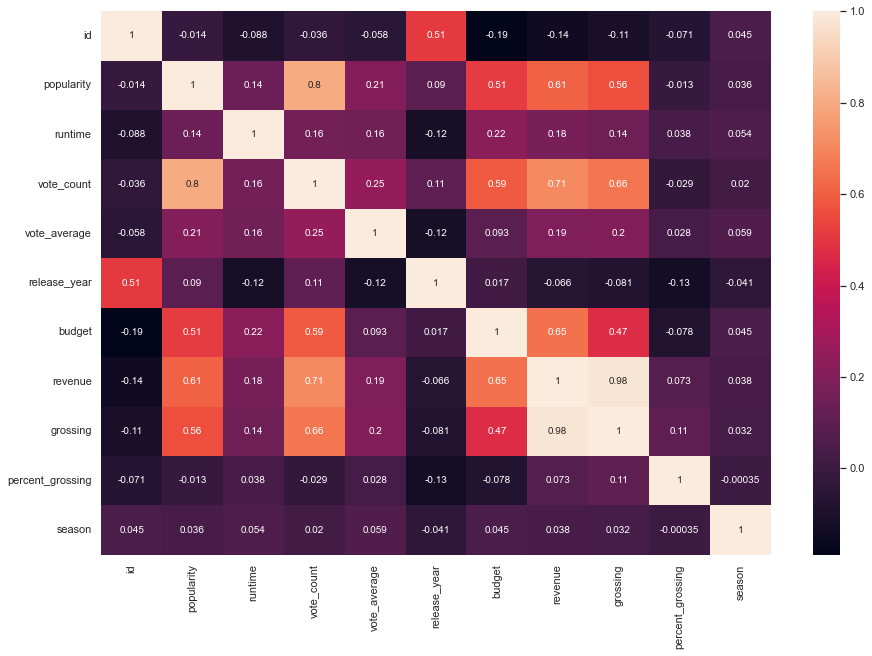

In [105]:
#Determining the Correlation between each variable

plt.figure(figsize=(15,10))
correlation_matrix = df.corr()

sns.heatmap(correlation_matrix, annot = True)

**Result**:
- The most significant correlations are between:
> 1. Popularity and Revenue (0.61)
> 2. Popularity and Grossing (0.56)
> 3. Revenue and Vote count (0.71)
> 4. Vote count and Grossing (0.66)
> 5. Revenue and Budget (0.65)


- The implications of these correlations are a bit straightforward: 
1. Popular movies should generally make higher revenue although not all the time.
2. Popular movies generally make more money although not all the time.
3. Movies that make a lot of revenue had a good reception from customers, and as a result got a very good vote count and vice-versa; although, not all the time.
4. A movie's vote count is simply a reflection of how much people enjoy the movies. The same goes for the Grossing of the movie.
5. Generally, the higher the revenue, the higher the budget the movie must have used; although not all the time.

**Question 1.0**:

Relationship between budget and popularity.

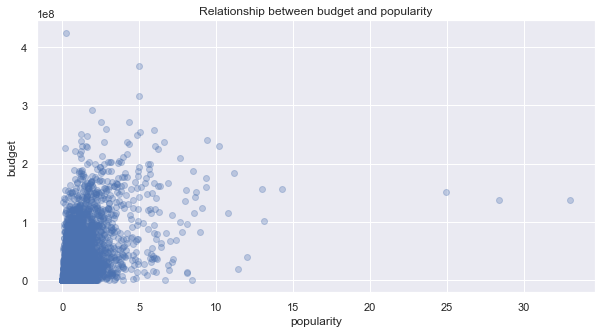

In [41]:
#Budget/Grossing

#1.0 Relationship between budget and popularity: There is some correlation between budget and popularity, around 0.6, so it is definitely worth checking out.
plt.figure(figsize=(10,5))
plt.scatter(df['popularity'], df['budget'], alpha= 0.3)
plt.xlabel('popularity')
plt.ylabel('budget')
plt.title('Relationship between budget and popularity');

**Result**:

From the above, we can see that there is some positive linear correlation between the budget and popularity and this is also seen from the heatmap at the beginning.<br>

This implies that generally speaking, the larger the budget of a movie, the more popular it should be, although this is not always the case

**Question 1.1**:

Which years were the largest budgets spent on movies

In [42]:
#1.1 Movies that had highest revenue for each year and what year was the most revenue made on movies

highest_revenue_movies_df = df.groupby('release_year', as_index=False)[['revenue', 'original_title']].max()

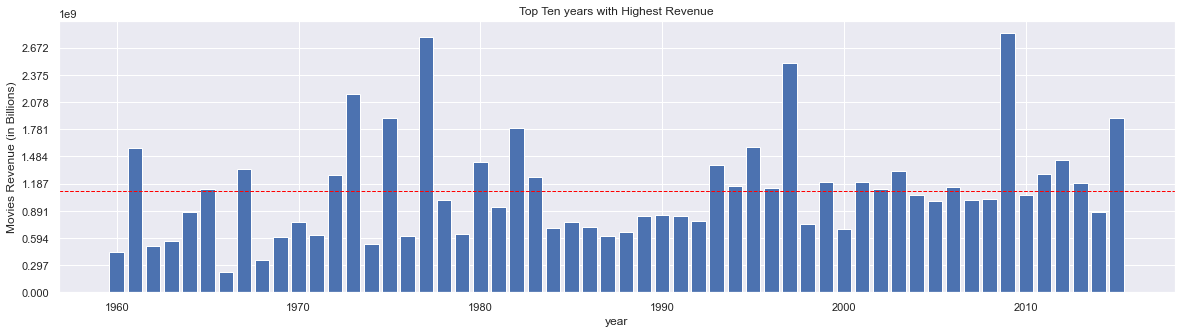

In [178]:
plt.figure(figsize = (20,5))

plt.bar(highest_revenue_movies_df['release_year'], highest_revenue_movies_df['revenue'])
plt.title("Top Ten years with Highest Revenue")
plt.xlabel('year')
plt.ylabel('Movies Revenue (in Billions)')

min_ylim, max_ylim = plt.ylim()
y_vals = plt.yticks(np.arange(min_ylim, max_ylim, max_ylim/10.0))

plt.axhline(highest_revenue_movies_df["revenue"].mean(), color = "red", linewidth = 1, linestyle = "dashed")
plt.text(5, 100000000, "average\nspend")

In [44]:
#Plotting the years with the top ten highest revenue

top_ten_highest_revenue_movies = highest_revenue_movies_df.nlargest(10, ['revenue'])
top_ten_highest_revenue_movies

,release_year,revenue,original_title
49,2009,2.827124e+09,zombieland
17,1977,2.789712e+09,wizards
37,1997,2.506406e+09,wishmaster
13,1973,2.167325e+09,westworld
15,1975,1.907006e+09,trilogy of terror
55,2015,1.902723e+09,zipper
22,1982,1.791694e+09,zapped
35,1995,1.583050e+09,white mans burden
1,1961,1.574815e+09,west side story
52,2012,1.443191e+09,zero dark thirty


In [45]:
top_ten_highest_revenue_movies['release_year'] = top_ten_highest_revenue_movies['release_year'].apply(str)

In [46]:
#1.1 Which years were the largest budgets spent on movies<br>
#1.2 Which years were the largest revenues made?<br>
#1.3 Which release months are associated with revenue

In [47]:
def peak_investments(dataframe_object, by_column, *aggregated_columns):
    f"""
    This function is used to generate the highest value of a metric on which we have grouped by. It will be especially used
    to find the highest revenues, grossing, and budgets. It outputs the ordered values from highest to lowest and also gives
    the top 10 highest values of the metric in consideration
    
    {dataframe_object}: This is simply the dataframe we'd like to work on.
    {by_column}: This is simply the column on which we would like to group by.
    {aggregated_columns}: This is just a list of columns on which we want to perform the aggregation on. In this case we would
    like to see the maximum values of these columns grouped by the by_column
    """
    highest_investments_df = dataframe_object.groupby(by_column, as_index = False)[list(aggregated_columns)].max()
    top_ten_highest_investments = highest_investments_df.nlargest(10, [aggregated_columns[0]])
    top_ten_highest_investments[by_column] = top_ten_highest_investments[by_column].apply(str)
    return top_ten_highest_investments, highest_investments_df

top_ten_revenue, _ = peak_investments(df, "release_year", "revenue", "original_title")

top_ten_revenue

,release_year,revenue,original_title
49,2009,2.827124e+09,zombieland
17,1977,2.789712e+09,wizards
37,1997,2.506406e+09,wishmaster
13,1973,2.167325e+09,westworld
15,1975,1.907006e+09,trilogy of terror
55,2015,1.902723e+09,zipper
22,1982,1.791694e+09,zapped
35,1995,1.583050e+09,white mans burden
1,1961,1.574815e+09,west side story
52,2012,1.443191e+09,zero dark thirty


In [48]:
#highest_revenue_movies_df = df.groupby('release_year', as_index=False)[['revenue', 'original_title']].max()
#top_ten_highest_revenue_movies = highest_revenue_movies_df.nlargest(10, ['revenue'])
#top_ten_highest_revenue_movies['release_year'] = top_ten_highest_revenue_movies['release_year'].apply(str)

#highest_grossing_movies_df = df.groupby('release_year', as_index=False)[['grossing', 'original_title']].max()
#top_ten_highest_grossing_movies = highest_grossing_movies_df.nlargest(10, ['grossing'])
#top_ten_highest_grossing_movies['release_year'] = top_ten_highest_grossing_movies['release_year'].apply(str)

#highest_budget_movies_df = df.groupby('release_year', as_index=False)[['budget', 'original_title']].max()
#top_ten_highest_budget_movies = highest_budget_movies_df.nlargest(10, ['budget'])
#top_ten_highest_budget_movies['release_year'] = top_ten_highest_budget_movies['release_year'].apply(str)


top_ten_highest_revenue, _ = peak_investments(df, "release_year", "revenue", "original_title")
top_ten_highest_grossing, _ = peak_investments(df, "release_year", "grossing", "original_title")
top_ten_highest_budget, _ = peak_investments(df, "release_year", "budget", "original_title")

The above charts give the years with the largest budget, highest grossing, and largest revenue. The years 2009, 1997, and 1973 have the highest revenue and highest grossing. <br>
<br>
Budgets for 2010, 2011, 2007, and 2006 were the largest, yet they are not in the top 10 years for revenue generated and highest grossing.

The last chart showing months against total revenue also seems to indicate that around May, June, July along with November, December, the revenue is usually the highest. This indicates that it is around the second and fourth quartiles of the year, that a movie released at these periods generate the most revenue.<br> 

<br>
We will investigate this further in the next question.

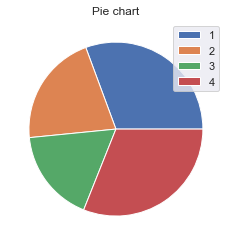

In [49]:
plt.pie(df.groupby("season")["revenue"].max())
plt.title("Pie chart")
plt.legend(["1", "2", "3", "4"])

Text(0.5, 1.0, 'Total number of movies per month')

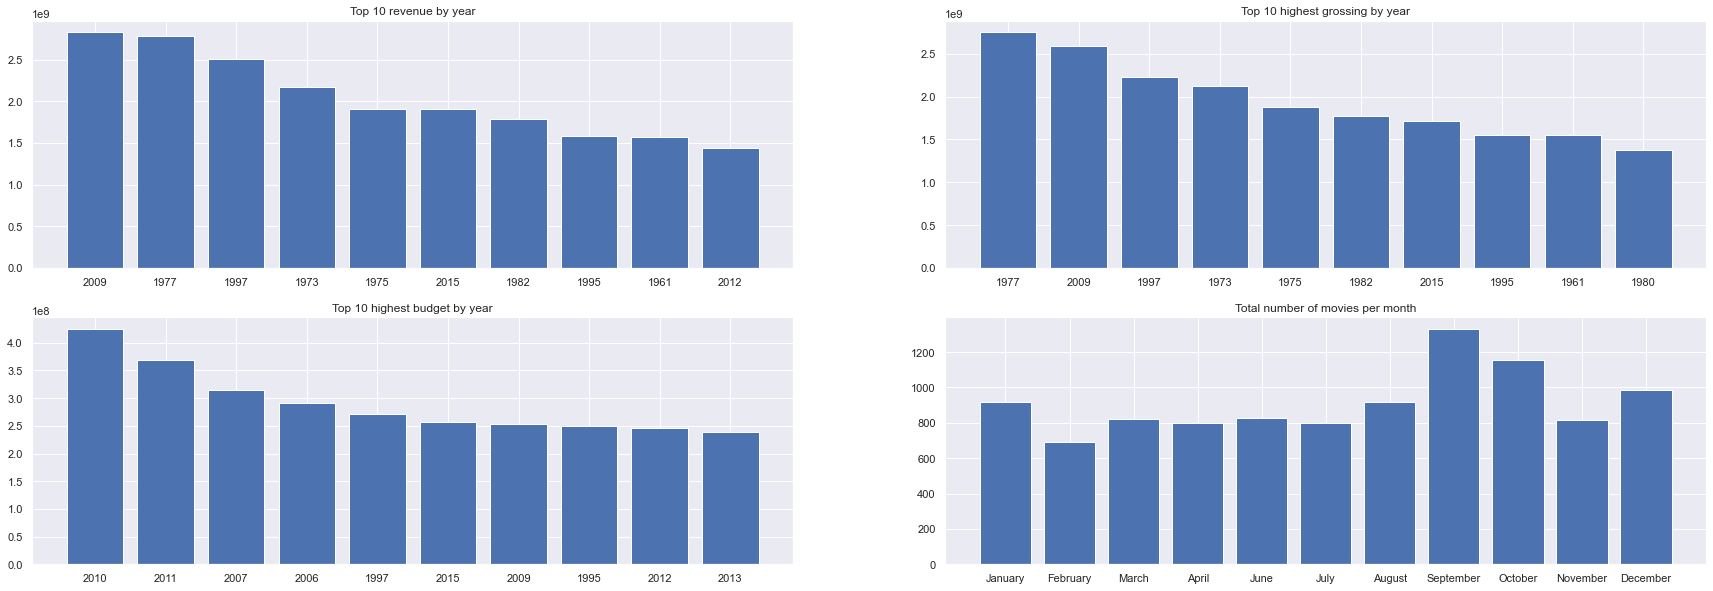

In [294]:

fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2,2,figsize=(30, 10))

ax1.bar(top_ten_highest_revenue['release_year'], top_ten_highest_revenue['revenue'])
ax1.set_title("Top 10 revenue by year")

ax2.bar(top_ten_highest_grossing['release_year'], top_ten_highest_grossing['grossing'])
ax2.set_title("Top 10 highest grossing by year")

ax3.bar(top_ten_highest_budget['release_year'], top_ten_highest_budget['budget'])
ax3.set_title("Top 10 highest budget by year")


month_order = ["January", "February", "March", "April", "June", "July", "August", 
               "September", "October", "November", "December"]

#num_movies_df = df.groupby(["month"]).sum().reindex(month_order)

num_movies_df = df.groupby(["month"]).size().reindex(month_order).reset_index(name = "number_of_movies")
ax4.bar(num_movies_df["month"], num_movies_df["number_of_movies"])
plt.title("Total number of movies per month")
#ax4.scatter(df['month'], df['revenue'], alpha = 0.3);


**Result**:

- 2009 and 1997 were the years with the highest grossing and revenue.

- September and October have the most number of movies released, followed by December and January. This should ordinarily imply that we should have more total revenue for the months of September and October than any other month.

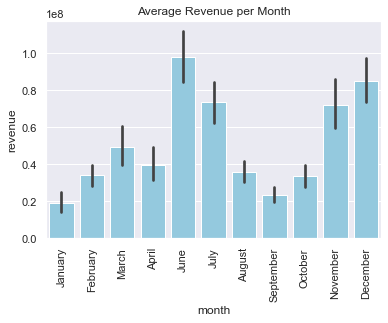

In [293]:
import matplotlib.colors as colors

month_order = ["January", "February", "March", "April", "June", "July", "August", 
               "September", "October", "November", "December"]


#norm = colors.LogNorm(vmin= df["vote_average"].min(), vmax=df["vote_average"].max())
#color_vals = [plt.cm.Blues(norm(c)) for c in df["vote_average"]]


#ax = sns.barplot(x = "month", y = "revenue", data = df, order= month_order, palette= color_vals)
#ax.set_xticklabels(ax.get_xticklabels(),rotation = 90)

#plt.colorbar()

#plt.legend(bbox_to_anchor=(1.05, 1.07),borderaxespad=0., loc=2, title='Revenue (in Billions)');

#sm = plt.cm.ScalarMappable(cmap="Blues", norm=norm)
#sm.set_array(1000000)
#ax.get_legend().remove()
#ax.figure.colorbar(sm)

ax = sns.barplot(x = "month", y = "revenue", data = df, order= month_order, color = "skyblue")
ax.set_xticklabels(ax.get_xticklabels(),rotation = 90)
plt.title("Average Revenue per Month");

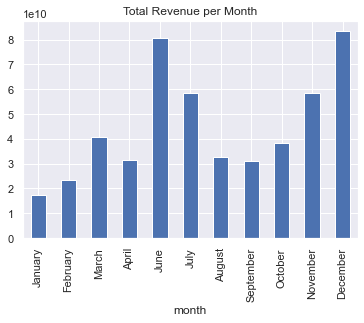

In [292]:
df.groupby(["month"])["revenue"].sum().reindex(month_order).plot(kind = "bar", title = "Total Revenue per Month");

**Result**:

- The revenue for September and October are actually the lowest despite them being the two months with the most number of movies released.

- June/July and November/December have the largest amount of revenue despite having low number of movies released

**Result**:

The season most movies are released. We already know the months. Now we want to know the quarters.

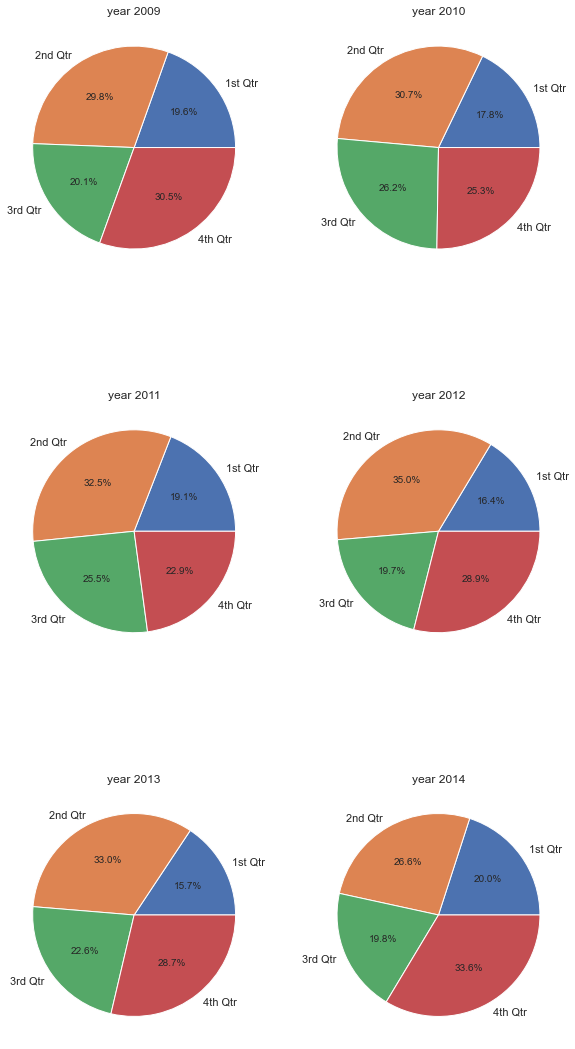

In [199]:
#1.4. The season most movies are released

#The years I am interested in are from 2009 to 2014.

df1 = df.set_index(['release_date'])

years = ['2009', '2010', '2011', '2012', '2013', '2014']

labels = ["1st Qtr", "2nd Qtr", "3rd Qtr", "4th Qtr"]

fig, ((ax1, ax2), (ax3, ax4), (ax5, ax6)) = plt.subplots(3,2,figsize=(10, 20))

#Using a for loop to create each subplot
for i, year in enumerate(years):
    per_season_df = df1.loc[year].groupby(['season']).sum()
    exec(f'ax{i+1}.pie(per_season_df["revenue"], labels=labels, autopct="%1.1f%%")')
    exec(f'ax{i+1}.set_title(f"year {year}")')
    #exec(f'ax{i+1}.legend(["1st Quarter","2nd Quarter","3rd Quarter","4th Quarter"], loc = "lower right")')
    
    
#for year in years:
 #   df1.loc[year].groupby(['season']).sum().plot(kind = 'pie', y = 'revenue',title = f'year {year}')
#df.groupby('season', as_index=False)[['grossing', 'original_title']].count()

**Result**:

Generally, movies released in the 2nd and 4th Quarters of the year tended to make more revenue

In [52]:
"""1.1 Movies that had highest revenue for each year.
1.2 Highest grossing movies for each year
1.3 The most expensive movie made each year"""

'1.1 Movies that had highest revenue for each year.\n1.2 Highest grossing movies for each year\n1.3 The most expensive movie made each year'

Question:

Movies with the highest Revenue for each year

<AxesSubplot:ylabel='original_title_release_year'>

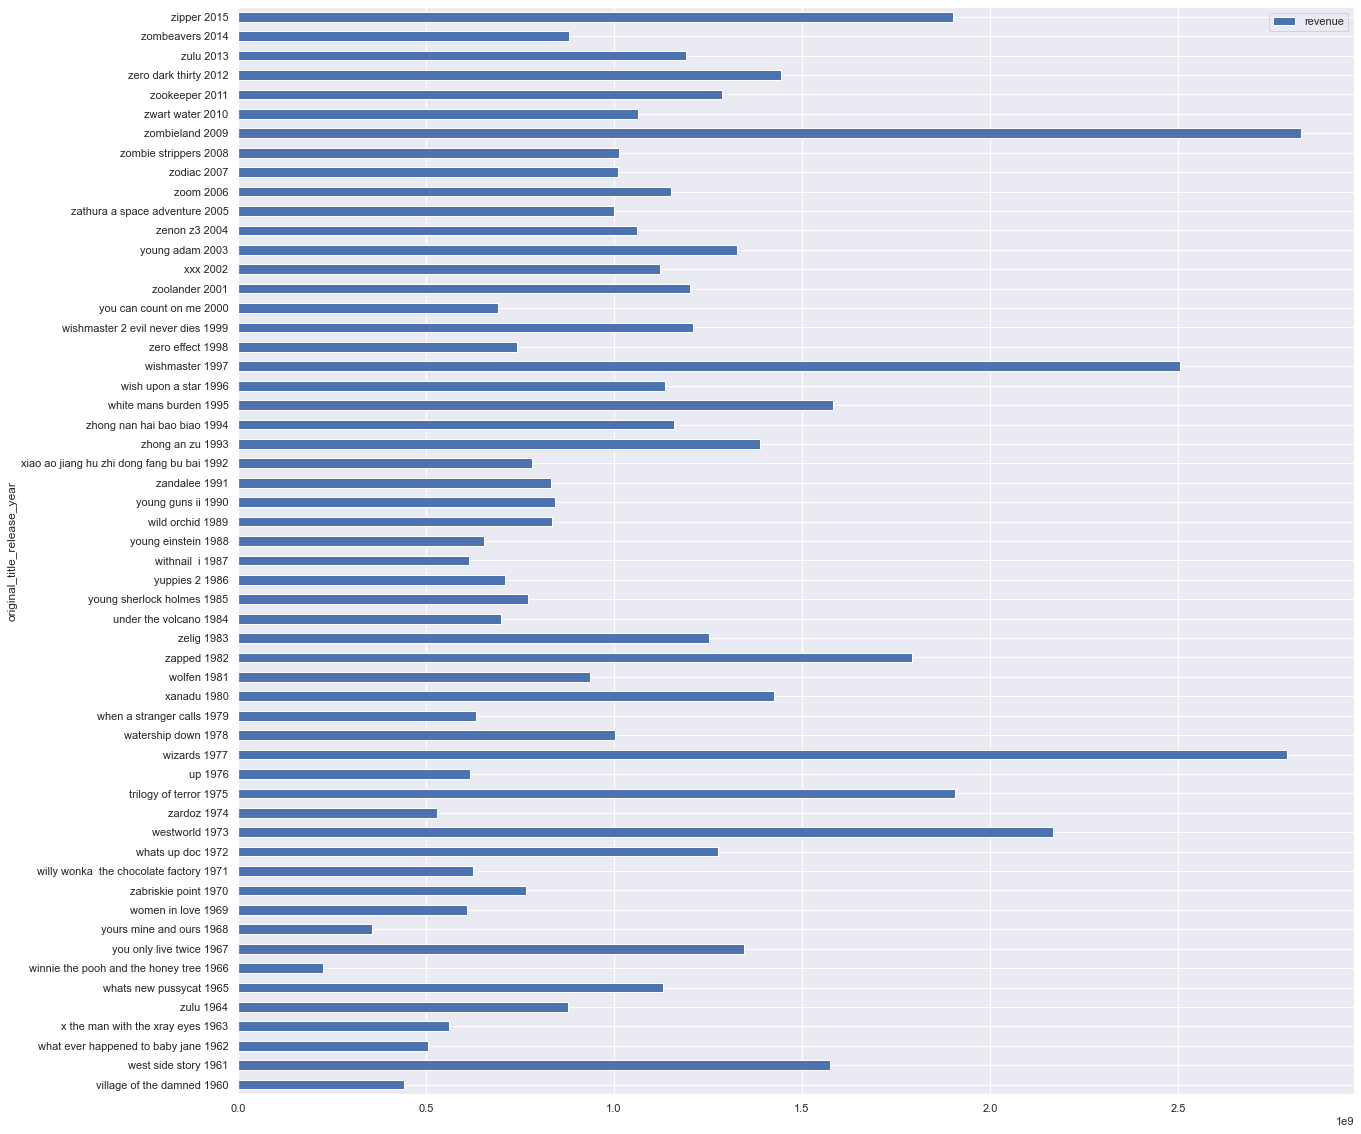

In [53]:
#1.1 Movies with the highest revenue by year.

max_rev = df.groupby(["release_year"])[["revenue", "original_title"]].max()

max_rev["original_title_release_year"] = max_rev["original_title"] + " " + max_rev.index.astype(str)

max_rev.plot.barh(x = "original_title_release_year", y = "revenue", figsize = (20, 20))

<AxesSubplot:ylabel='original_title_release_year'>

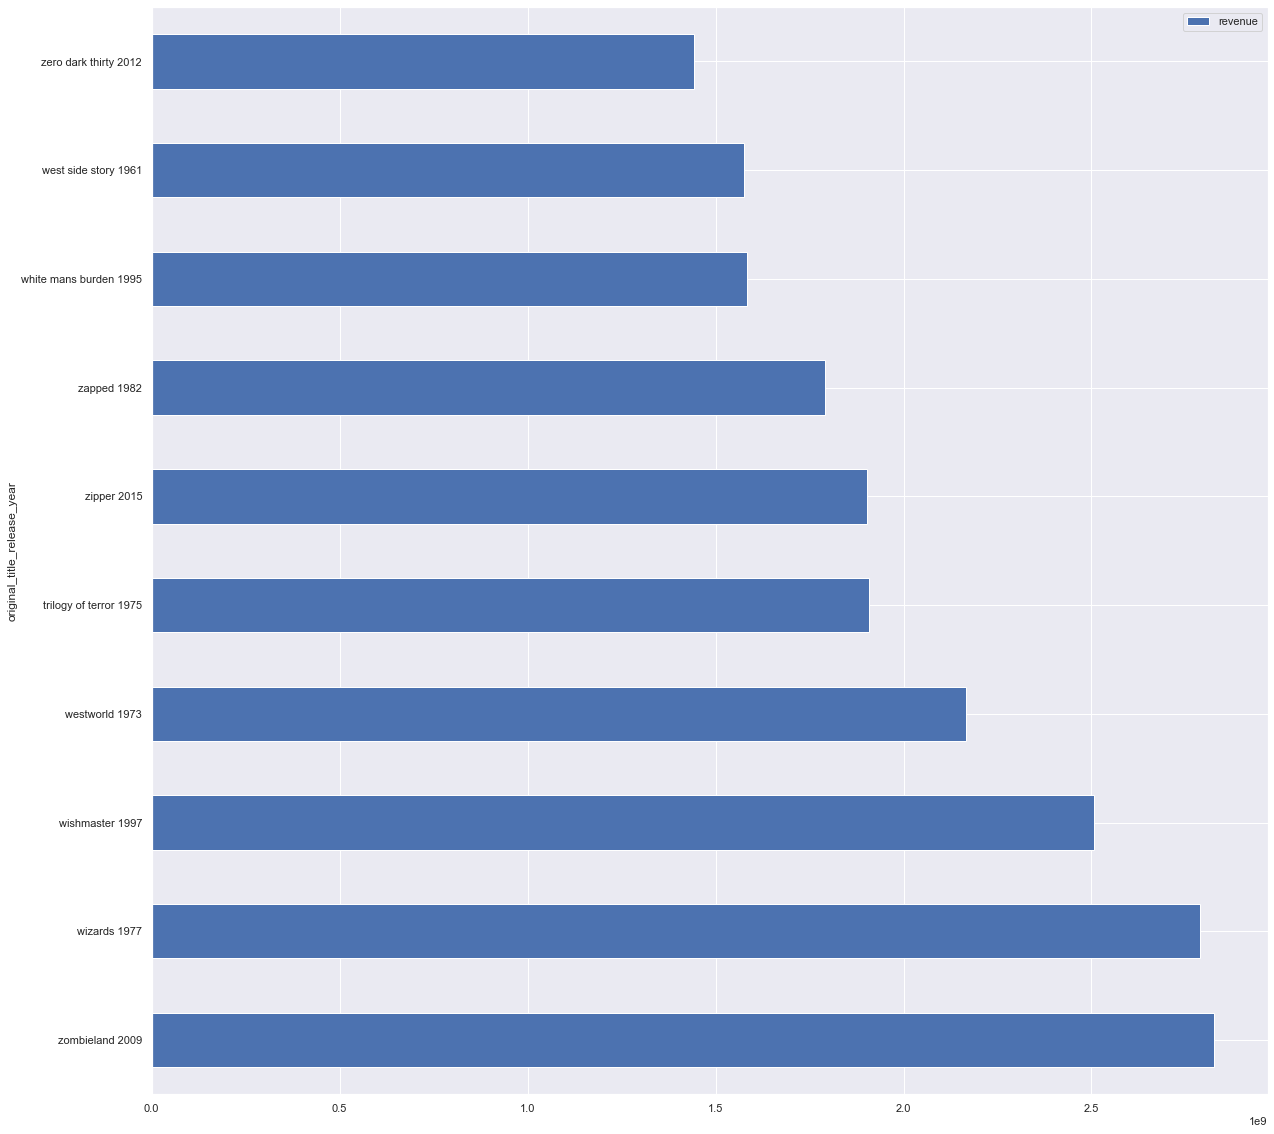

In [54]:
#Top 10 movies with highest adjusted revenue ever from 1960 to 2015                                                                              figsize = (20,20), )

max_rev.nlargest(10, ["revenue"]).plot.barh(x = "original_title_release_year", y = "revenue", figsize = (20, 20))

Question:

Movies with the highest budget for each year.

<AxesSubplot:ylabel='original_title_release_year'>

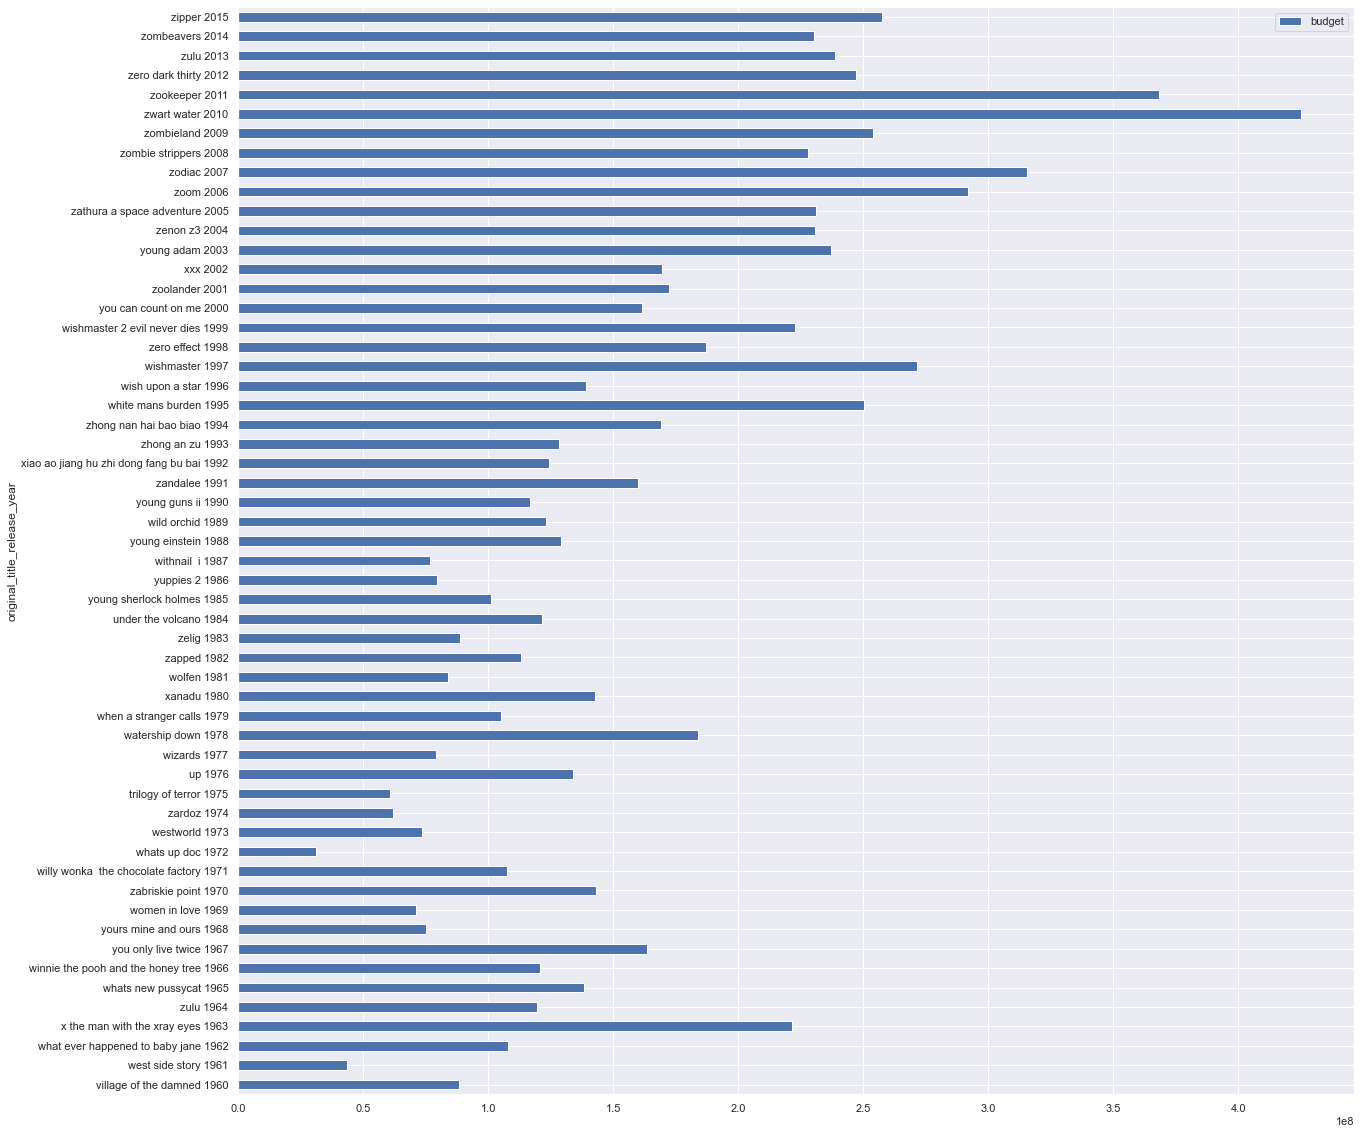

In [55]:
#1.1 Movies with the highest budget by year.

max_budget = df.groupby(["release_year"])[["budget", "original_title"]].max()

max_budget["original_title_release_year"] = max_budget["original_title"] + " " + max_budget.index.astype(str)

max_budget.plot.barh(x = "original_title_release_year", y = "budget", figsize = (20, 20))

Text(0, 0.5, 'Movie Name')

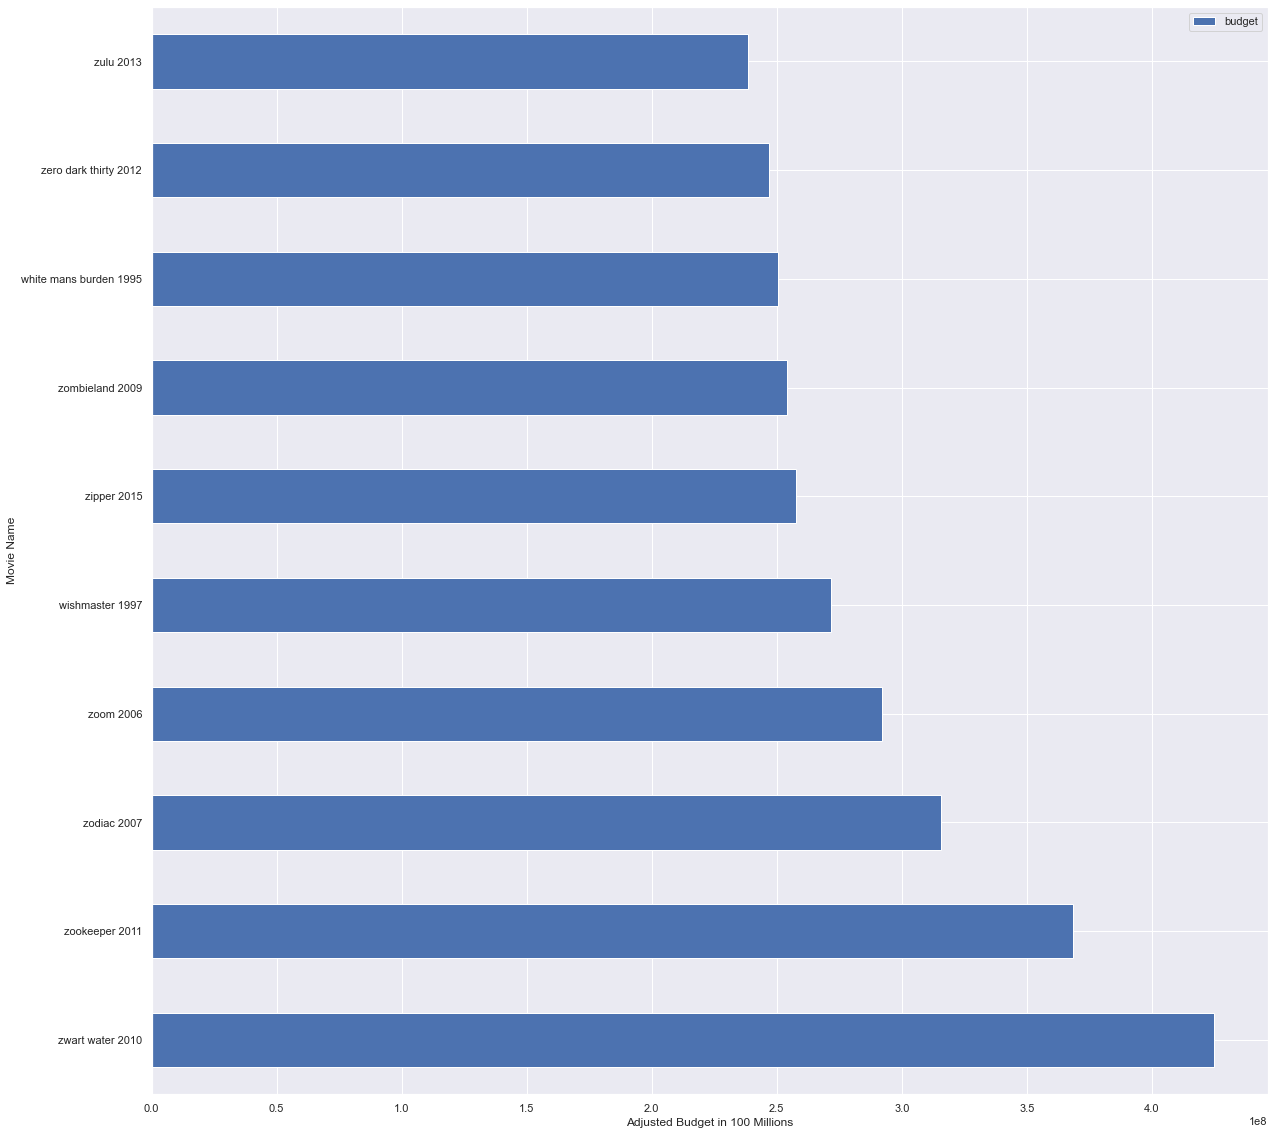

In [56]:
#Top 10 movies with highest adjusted budget ever from 1960 to 2015                                                                              figsize = (20,20), )

max_budget_plot = max_budget.nlargest(10, ["budget"]).plot.barh(x = "original_title_release_year", y = "budget", figsize = (20, 20))

max_budget_plot.set_xlabel("Adjusted Budget in 100 Millions")
max_budget_plot.set_ylabel("Movie Name")

Question 2.0

Actors with the most number of movies

In [57]:
"""2.0: Actors associated with high budget movies
2.1: Actors that like to act together.
2.2: Actors associated with highly rated movies.
"""

'2.0: Actors associated with high budget movies\n2.1: Actors that like to act together.\n2.2: Actors associated with highly rated movies.\n'

In [309]:
actors_num_movies = df_cast.groupby(["cast"]).size().reset_index(name = "number_of_movies")
actors_num_movies.nlargest(20, "number_of_movies")

,cast,number_of_movies
15551,robert_de_niro,72
16296,samuel_l_jackson,71
2552,bruce_willis,62
13804,nicolas_cage,61
12753,michael_caine,53
15731,robin_williams,51
9077,john_cusack,50
9119,john_goodman,49
13379,morgan_freeman,49
11176,liam_neeson,48


In [304]:
#Actors with the most movies in the dataset

a = df_cast["cast"].value_counts()
a

robert_de_niro       72
samuel_l_jackson     71
bruce_willis         62
nicolas_cage         61
michael_caine        53
                     ..
carson_underwood      1
eric_window           1
david_clark           1
courtney_abbiati      1
stephanie_nielson     1
Name: cast, Length: 19254, dtype: int64

In [305]:
text = ""
for i in range(a.size):
    name = a.index[i]+" "
    name = name * a[i]
    text = text + name
    #text = text * a[i]

text

'robert_de_niro robert_de_niro robert_de_niro robert_de_niro robert_de_niro robert_de_niro robert_de_niro robert_de_niro robert_de_niro robert_de_niro robert_de_niro robert_de_niro robert_de_niro robert_de_niro robert_de_niro robert_de_niro robert_de_niro robert_de_niro robert_de_niro robert_de_niro robert_de_niro robert_de_niro robert_de_niro robert_de_niro robert_de_niro robert_de_niro robert_de_niro robert_de_niro robert_de_niro robert_de_niro robert_de_niro robert_de_niro robert_de_niro robert_de_niro robert_de_niro robert_de_niro robert_de_niro robert_de_niro robert_de_niro robert_de_niro robert_de_niro robert_de_niro robert_de_niro robert_de_niro robert_de_niro robert_de_niro robert_de_niro robert_de_niro robert_de_niro robert_de_niro robert_de_niro robert_de_niro robert_de_niro robert_de_niro robert_de_niro robert_de_niro robert_de_niro robert_de_niro robert_de_niro robert_de_niro robert_de_niro robert_de_niro robert_de_niro robert_de_niro robert_de_niro robert_de_niro robert_de

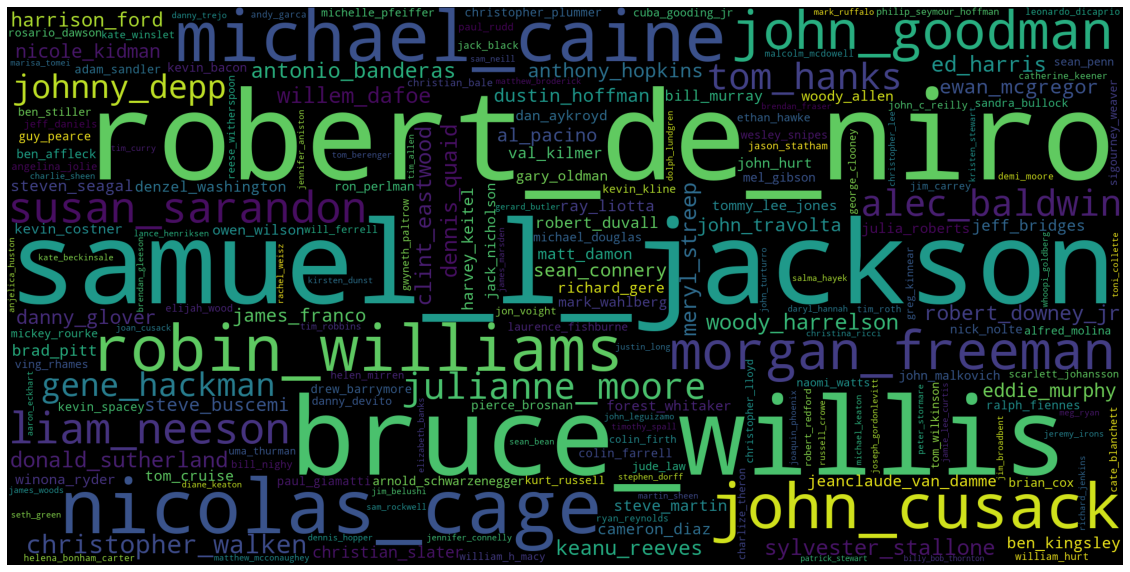

In [306]:
from wordcloud import WordCloud

wordcloud = WordCloud(width = 2000, height = 1000, collocations= False).generate(text)

plt.figure(figsize = (20, 20))
plt.imshow(wordcloud)
plt.axis("off")
plt.margins(x = 0, y = 0)
plt.show()

Question 2.1:

Actors associated with high budget movies

In [63]:
#Actors with budgets greater than 10Million

big_budget_cast = df_cast[df_cast["budget"] > 10_000_000]["cast"].value_counts()[:20]
big_budget_cast = big_budget_cast.sort_values(ascending = False)
ranger = range(1, len(big_budget_cast.index) + 1)
big_budget_cast

robert_de_niro        55
bruce_willis          54
nicolas_cage          48
samuel_l_jackson      45
johnny_depp           37
morgan_freeman        36
matt_damon            35
eddie_murphy          35
sylvester_stallone    34
nicole_kidman         34
harrison_ford         34
tom_hanks             33
brad_pitt             33
tom_cruise            33
robin_williams        32
liam_neeson           32
denzel_washington     32
antonio_banderas      31
meryl_streep          31
mark_wahlberg         30
Name: cast, dtype: int64

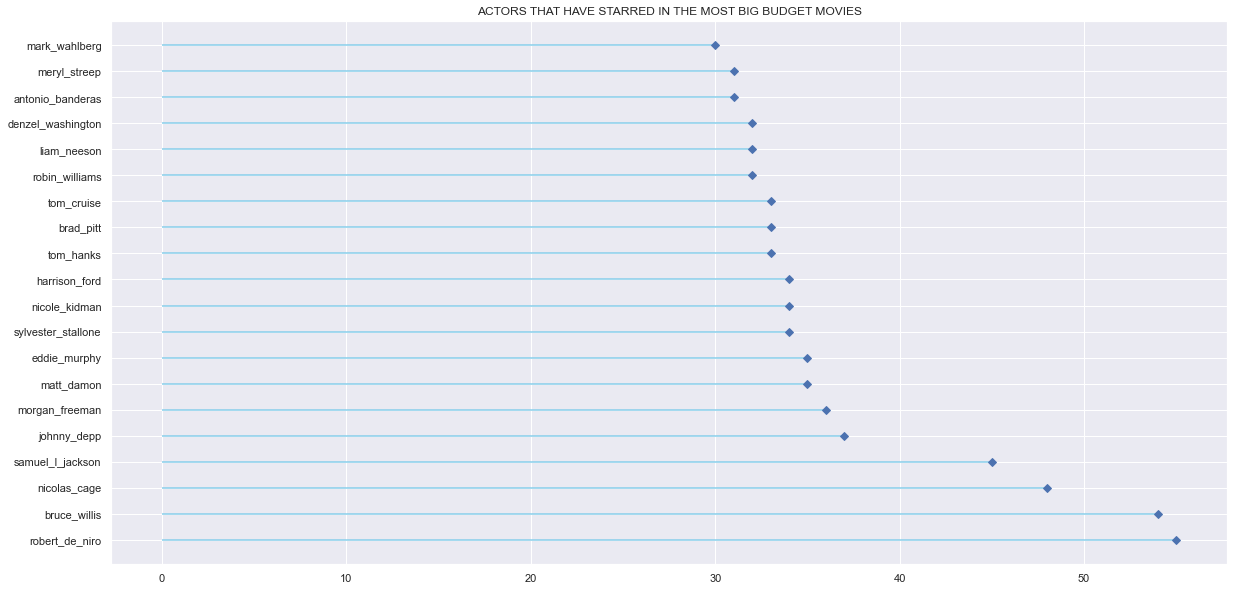

In [64]:
plt.figure(figsize= (20, 10))
plt.hlines(y = ranger, xmin = 0, xmax = big_budget_cast, color = "skyblue")
plt.plot(big_budget_cast, ranger, "D")
plt.yticks(ranger, big_budget_cast.index)
plt.title("ACTORS THAT HAVE STARRED IN THE MOST BIG BUDGET MOVIES")
plt.show()

Question 2.2:

2.2: Actors associated with highly rated movies.

In [65]:
#Actors in movies with a rating of 7.0 or higher.

df_cast[df_cast["vote_average"] >= 7.0]["cast"].value_counts()[:10]

robert_de_niro       20
tom_hanks            18
samuel_l_jackson     16
brad_pitt            14
michael_caine        13
leonardo_dicaprio    12
mark_ruffalo         12
johnny_depp          12
al_pacino            12
denzel_washington    11
Name: cast, dtype: int64

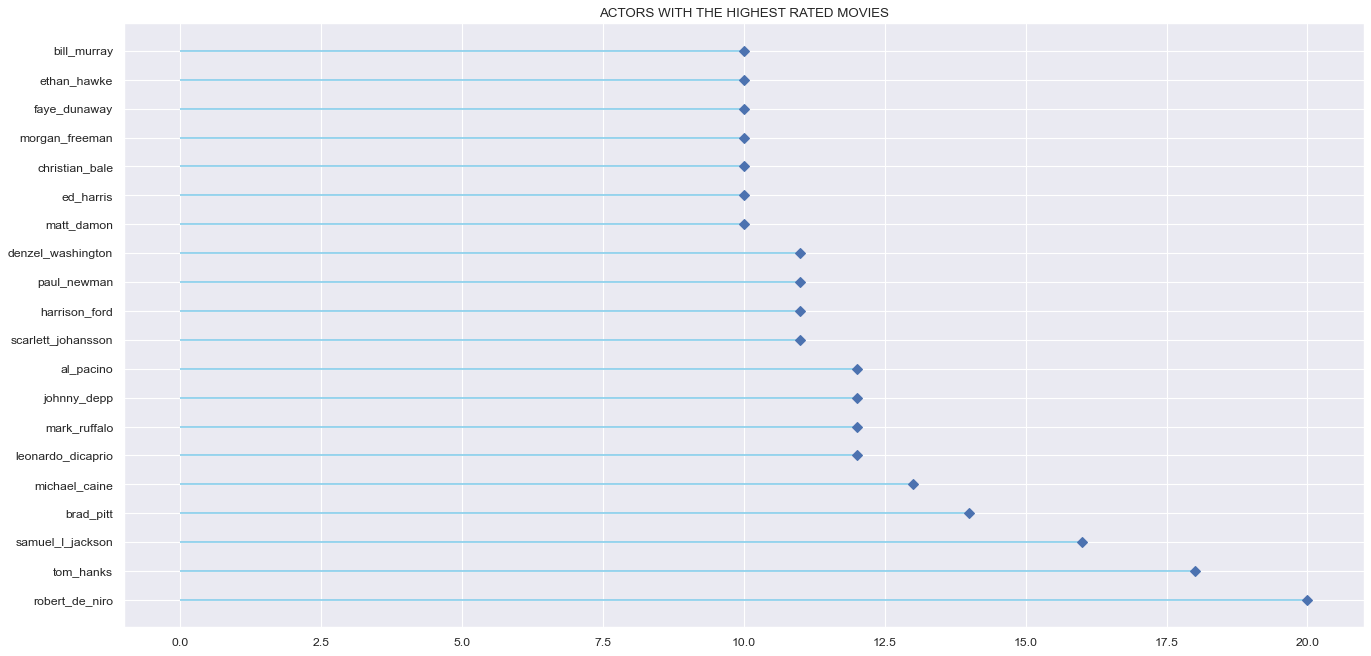

In [66]:
high_rating_cast = df_cast[df_cast["vote_average"] >= 7.0]["cast"].value_counts()[:20]
high_rating_cast = high_rating_cast.sort_values(ascending = False)
ranger = range(1, len(high_rating_cast.index) + 1)
#high_rating_cast

plt.figure(figsize= (20, 10), dpi = 80)
plt.hlines(y = ranger, xmin = 0, xmax = high_rating_cast, color = "skyblue")
plt.plot(high_rating_cast, ranger, "D")
plt.yticks(ranger, high_rating_cast.index)
plt.title("ACTORS WITH THE HIGHEST RATED MOVIES")
plt.show()

Question 2.3:

Actors that like to act together

In [67]:
df_cast["cast"].value_counts()

robert_de_niro       72
samuel_l_jackson     71
bruce_willis         62
nicolas_cage         61
michael_caine        53
                     ..
carson_underwood      1
eric_window           1
david_clark           1
courtney_abbiati      1
stephanie_nielson     1
Name: cast, Length: 19254, dtype: int64

In [68]:
movies_by_actor = df_cast.groupby("cast")["original_title"].apply(tuple).to_dict()
movies_by_actor

{'': ('sing si lip yan',),
 '50_cent': ('southpaw',
  'dead man running',
  'gun',
  'righteous kill',
  'setup',
  'all things fall apart',
  'blood out',
  'fire with fire',
  'freelancers',
  'escape plan',
  'get rich or die tryin',
  'home of the brave'),
 '_': ('ong bak 2',),
 '_larry_mullen_jr': ('u2 vertigo 2005  live from chicago',
  'u2 rattle and hum'),
 '_nicole_muoz': ('center stage  turn it up',),
 '_th_hi_yn': ('the quiet american',),
 '_therese_giehse': ('black moon',),
 'a_j_langer': ('the people under the stairs',),
 'a_martinez': ('the terminators', 'curse of chucky', 'jimmy p'),
 'a_michael_baldwin': ('phantasm iii lord of the dead',
  'phantasm',
  'phantasm iv oblivion'),
 'aaliyah': ('queen of the damned', 'romeo must die'),
 'aamir_khan': ('3 idiots',
  'sarfarosh',
  'dil chahta hai',
  'ghajini',
  'dhobi ghat',
  'talaash',
  'bombay talkies',
  'ghulam'),
 'aanjjan_srivastav': ('arjun the warrior prince',),
 'aaran_thomas': ('hannibal rising',),
 'aarif_lee'

In [69]:
from collections import defaultdict
#some_dict = { 'abc':'a', 'cdf':'b', 'gh':'a', 'fh':'g', 'hfz':'g' }
common_movies_dict = defaultdict(list)
for k, v in movies_by_actor.items():
    common_movies_dict[v].append(k)

In [70]:
common_movies_dict

defaultdict(list,
            {('sing si lip yan',): ['',
              'joey_wong',
              'kumiko_goto',
              'richard_norton'],
             ('southpaw',
              'dead man running',
              'gun',
              'righteous kill',
              'setup',
              'all things fall apart',
              'blood out',
              'fire with fire',
              'freelancers',
              'escape plan',
              'get rich or die tryin',
              'home of the brave'): ['50_cent'],
             ('ong bak 2',): ['_',
              'primorata_dejudom',
              'sarunyu_wongkrachang'],
             ('u2 vertigo 2005  live from chicago',
              'u2 rattle and hum'): ['_larry_mullen_jr', 'adam_clayton'],
             ('center stage  turn it up',): ['_nicole_muoz',
              'sarah_jayne_jensen'],
             ('the quiet american',): ['_th_hi_yn'],
             ('black moon',): ['_therese_giehse',
              'alexandra_stewart',
  

In [71]:
len(common_movies_dict)

12567

In [72]:
#2.1: Actors that like to act together.

m ={k:v for (k,v) in common_movies_dict.items() if len(v) > 1}
n = {k:v for (k,v) in m.items() if len(k)>2}
n

{('phantasm iii lord of the dead',
  'phantasm',
  'phantasm iv oblivion'): ['a_michael_baldwin', 'bill_thornbury'],
 ('jackass 3d',
  'jackass the movie',
  'jackass number two',
  'jackass 25'): ['bam_margera', 'steveo'],
 ('jay and silent bob strike back', 'clerks', 'clerks ii'): ['brian_ohalloran',
  'jeff_anderson'],
 ('eating out all you can eat',
  'eating out drama camp',
  'eating out the open weekend'): ['chris_salvatore', 'daniel_skelton'],
 ('paradise lost 3 purgatory',
  'west of memphis',
  'paradise lost the child murders at robin hood hills'): ['damien_wayne_echols',
  'jason_baldwin'],
 ('george harrison living in the material world',
  'good ol freda',
  'imagine john lennon',
  'yellow submarine',
  'a hard days night',
  'magical mystery tour',
  'let it be',
  'help'): ['george_harrison', 'john_lennon'],
 ('one direction where we are  the concert',
  'one direction up all night  the live tour',
  'one direction this is us'): ['harry_styles',
  'liam_payne',
  'loui

In [73]:
"""Directors
3.0 Directors associated with high budget movies
3.1 Directors associated with highly rated movies.
"""

'Directors\n3.0 Directors associated with high budget movies\n3.1 Directors associated with highly rated movies.\n'

Question:

3.0 Directors associated with the most movies

In [74]:
#Directors with the most movies

df_director["director"].value_counts().sort_values(ascending= False)[:10]

woody_allen          46
clint_eastwood       34
martin_scorsese      31
steven_spielberg     30
steven_soderbergh    23
ridley_scott         23
ron_howard           22
joel_schumacher      21
tim_burton           20
brian_de_palma       20
Name: director, dtype: int64

Question:

3.1 Directors associated with high budget movies

In [75]:
#3.0 Directors associated with high budget movies

df_director[df_director["budget"] > 10_000_000]["director"].value_counts()[:10]

steven_spielberg     29
woody_allen          23
clint_eastwood       23
ridley_scott         21
martin_scorsese      17
steven_soderbergh    16
ron_howard           16
tim_burton           16
oliver_stone         15
renny_harlin         15
Name: director, dtype: int64

3.2 Directors associated with highly rated movies

In [76]:
#3.2 Directors associated with highly rated movies

df_director[df_director["vote_average"] > 7.0]["director"].value_counts()[:10]

martin_scorsese      13
quentin_tarantino    10
steven_spielberg     10
clint_eastwood        9
joel_coen             8
david_fincher         8
christopher_nolan     8
david_lynch           7
wes_anderson          7
woody_allen           7
Name: director, dtype: int64

3.3.  Directors associated with low rated movies

In [312]:
df_director[df_director["vote_average"] < 6.5]["director"].value_counts()[:10]

woody_allen          24
peter_hyams          16
uwe_boll             16
steven_soderbergh    16
ron_howard           15
renny_harlin         15
joel_schumacher      15
wes_craven           15
robert_rodriguez     14
ridley_scott         14
Name: director, dtype: int64

In [77]:
"""4.1 Average runtime per year.
4.2 Is runtime a factor in how people rate?
4.3 Do runtime and budget have a correlation.
4.4 Which genres have the longest run times?
"""

'4.1 Average runtime per year.\n4.2 Is runtime a factor in how people rate?\n4.3 Do runtime and budget have a correlation.\n4.4 Which genres have the longest run times?\n'

<AxesSubplot:>

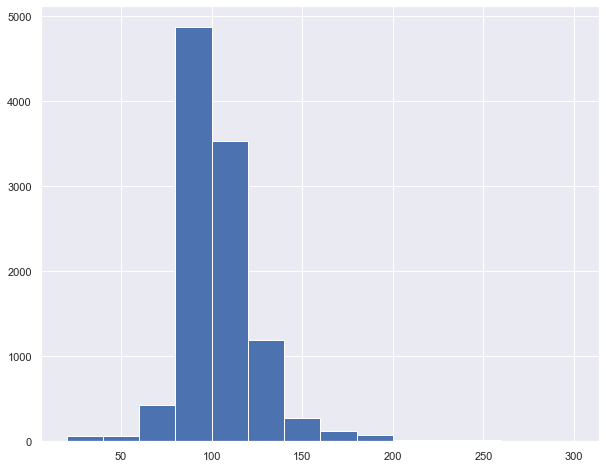

In [315]:
#4.1 Average runtime per year
df["runtime"].hist(bins = [20, 40, 60, 80, 100, 120, 140, 160, 180, 200, 220, 240, 260, 280, 300], figsize = (10, 8))
#df.groupby("release_year")["runtime"].mean()

In [79]:
df["runtime"].mean()

102.07086324314375

In [80]:
df["runtime"].median()

99.0

**Result**:

The typical runtime of a movie is about 99-102 minutes

Question

How has runtime changed over the years?

<AxesSubplot:ylabel='release_year'>

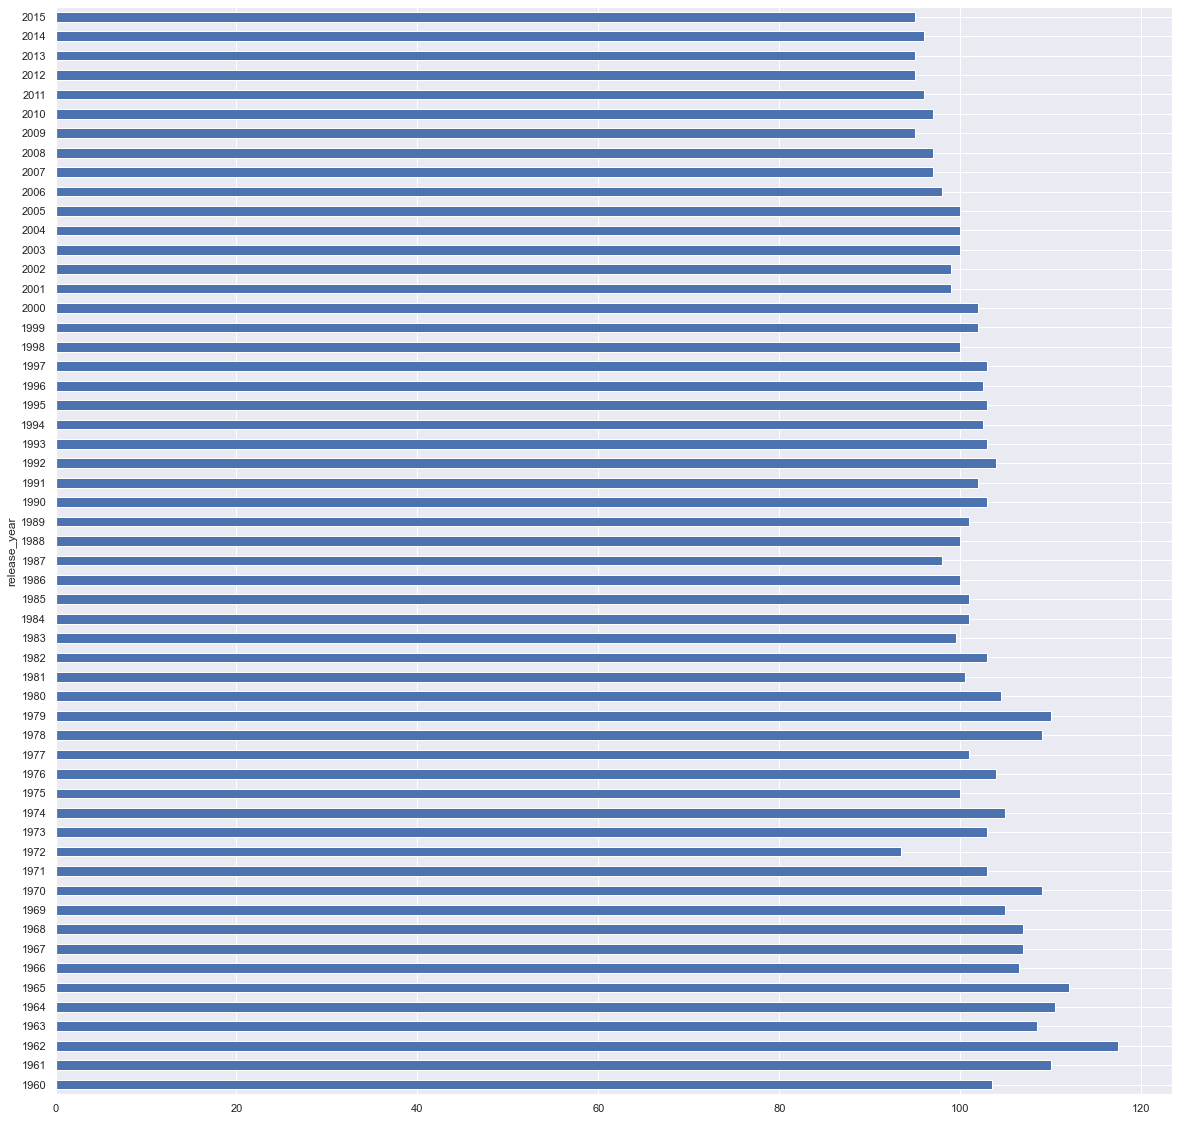

In [81]:
df.groupby("release_year")["runtime"].median().plot.barh(figsize = (20,20))

Question:

How does runtime vary with the vote_average of audiences?

Text(0.5, 1.0, 'Vote Average Vs Movie Runtime')

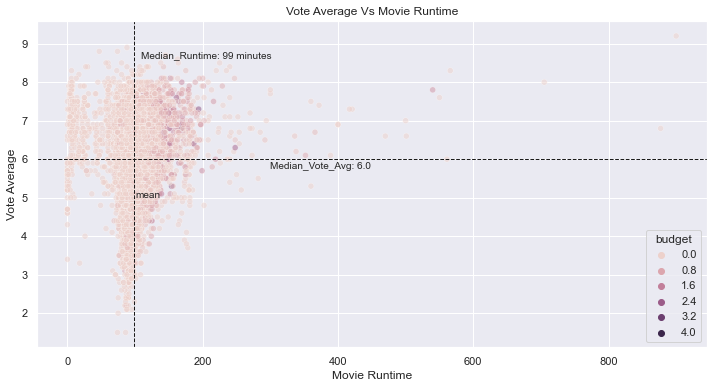

In [139]:
plt.figure(figsize = (12, 6))
sns.scatterplot(x = "runtime", y = "vote_average", data = df, hue = "budget", alpha = 0.5)

min_ylim, max_ylim = plt.ylim()
plt.axvline(df["runtime"].median(), color='k', linestyle='dashed', linewidth=1)
plt.text(df["runtime"].median()*1.1, max_ylim*0.9, 'Median_Runtime: {:.0f} minutes'.format(df["runtime"].median()))

min_xlim, max_xlim = plt.xlim()
plt.axhline(df["vote_average"].median(), color='k', linestyle='dashed', linewidth=1)
plt.text(df["vote_average"].median()*50, 0.6*max_ylim, 'Median_Vote_Avg: {:.1f}'.format(df["vote_average"].median()))

plt.xlabel("Movie Runtime")
plt.ylabel("Vote Average")


plt.title("Vote Average Vs Movie Runtime")

- The scatterplot is divided into quadrants representing 4 different types of movies. They are:
> 1. Movies that had a high vote_average and less runtime
> 2. Movies that had high vote_average and more runtime.
> 3. Movies that had low vote_average and less runtime.
> 4. Movies that had low vote_average and more runtime.
>

- Majority of the big budget movies lie in the 2nd quadrant with high vote_average and more runtime. They represent a really good set of movies to be watched.
- The movies with bad vote_averages and high runtime as well as high budget are not the best but perhaps might be worth seeing due to the amount spent on production.
- Movies that are not worth it at all are those with low budget, low runtime and low vote_averages.
- The hidden gems are the top left movies with low budget, yet, high vote_averages and low runtime


Question:

Relationship between vote_average and budget.

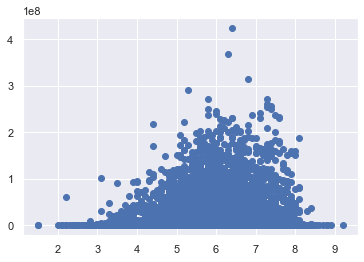

In [138]:
#4.3 Do runtime and budget have a correlation
plt.scatter(df["vote_average"], df["budget"])

In [84]:
df_genres.groupby("genres")["runtime"].median().sort_values()

genres
short                      6.0
softcore_pornographic     71.0
pornographic              71.0
erotica                   71.0
concert                   76.0
animation                 78.0
children's_film           80.5
tv_movie                  90.0
family                    91.0
horror                    92.0
documentary               93.0
comedy                    96.0
science_fiction           96.0
fantasy                   97.0
nan                       98.0
thriller                 100.0
foreign                  100.0
adventure                101.0
action                   101.0
mystery                  102.0
music                    104.0
romance                  104.0
crime                    104.0
spy                      105.0
action_thriller          105.0
drama                    106.0
western                  112.0
war                      118.0
history                  123.0
Name: runtime, dtype: float64

<AxesSubplot:ylabel='genres'>

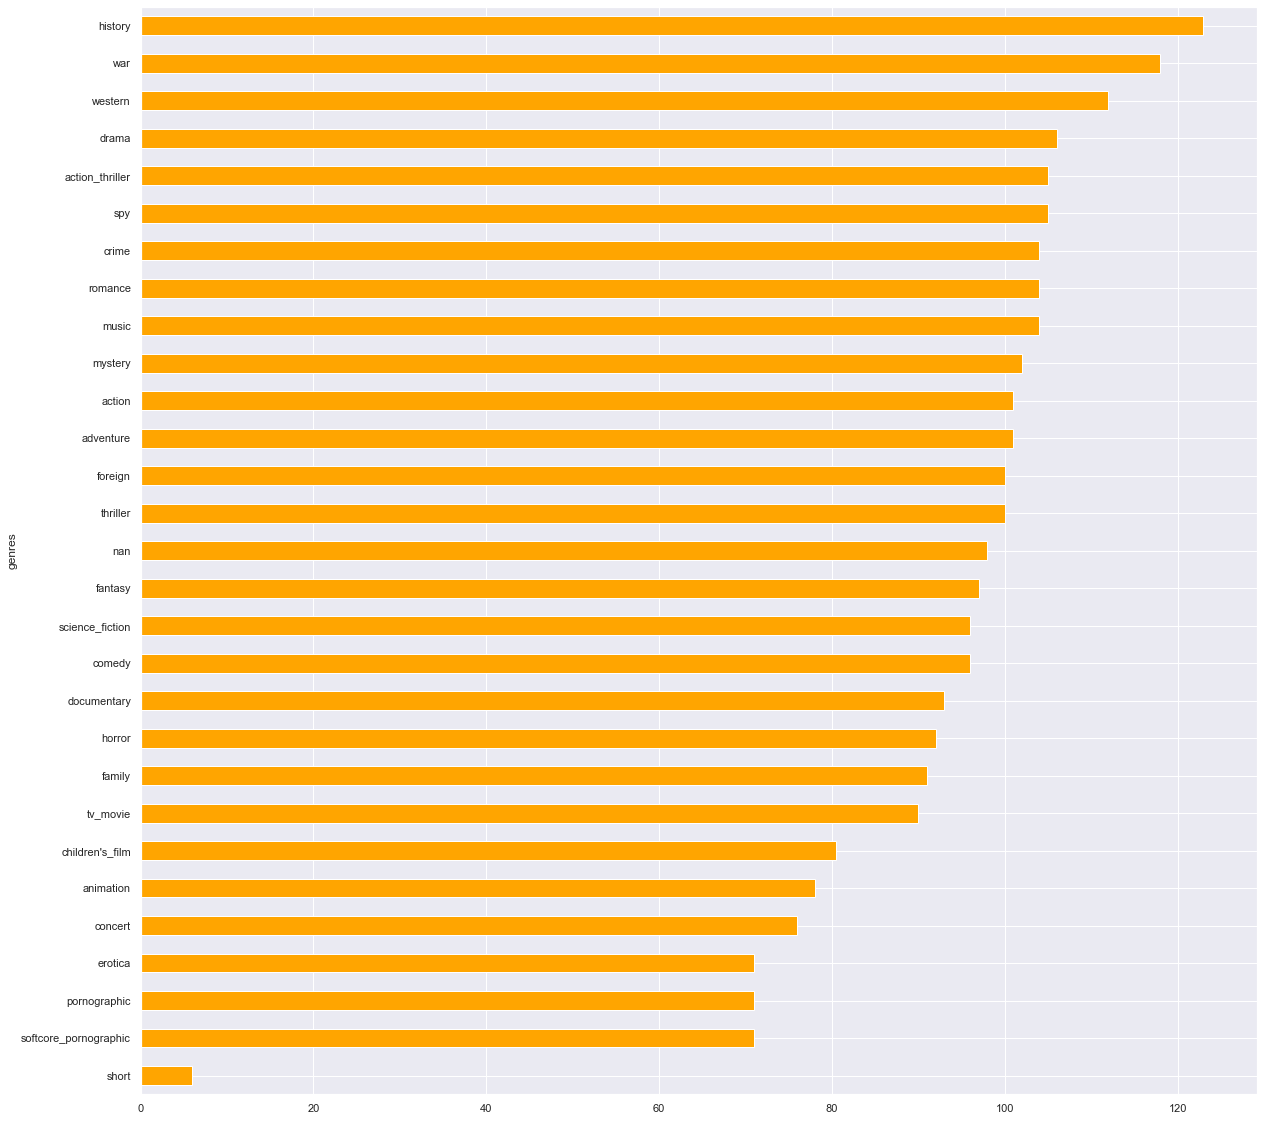

In [310]:
#4.4 Which genres have the longest run times
df_genres.groupby("genres")["runtime"].median().sort_values().plot.barh(figsize = (20,20), color = 'orange')

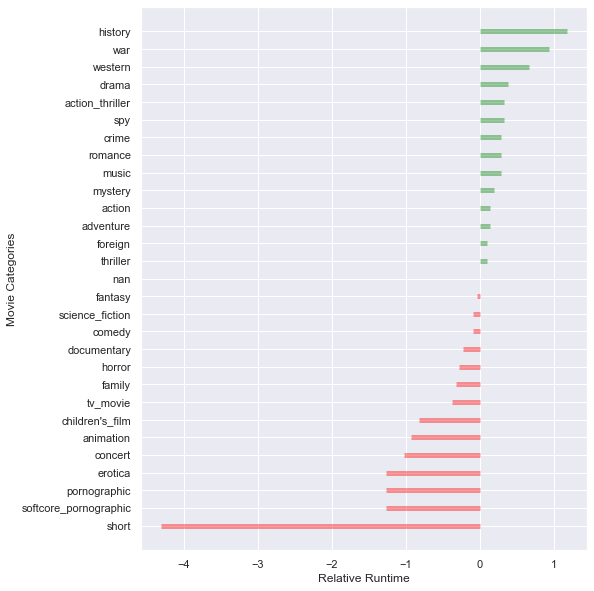

In [311]:
runtime_df = df_genres.groupby(["genres"])[["runtime", "vote_count" ]].median()
runtime_df.head()

x = runtime_df.loc[:, ["runtime"]]
runtime_df["runtime_z"] = (x - x.median())/x.std()

runtime_df["colors"] = ["red" if i < 0 else "green" for i in runtime_df["runtime_z"]]

runtime_df.sort_values("runtime_z", inplace = True)

plt.figure(figsize= (8,10))
plt.hlines(y = runtime_df.index, xmin = 0, xmax = runtime_df["runtime_z"], color = runtime_df["colors"], alpha = 0.4, linewidth = 5)

plt.gca().set(ylabel = "Movie Categories", xlabel = "Relative Runtime")
plt.yticks(runtime_df.index, runtime_df.index)
#plt.legend()
plt.show()


**Result**:

Historical movies take the most time

Question:

Which Genre makes the most money?

<AxesSubplot:ylabel='genres'>

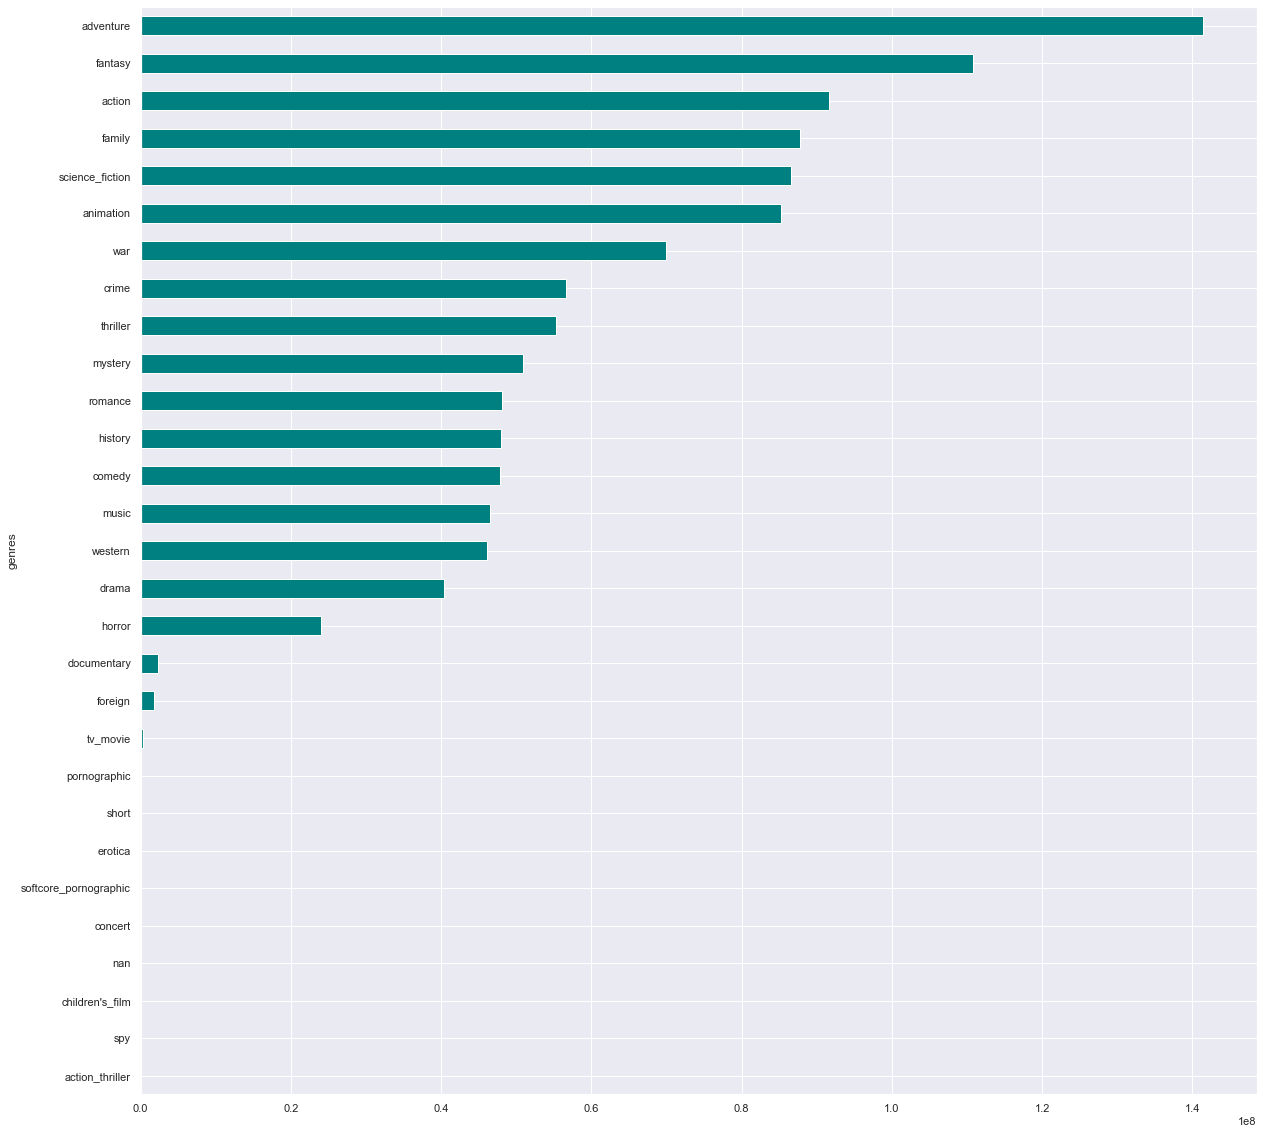

In [322]:
df_genres.groupby("genres")["revenue"].mean().sort_values().plot.barh(figsize = (20,20), color = 'teal')

Question:

Which Genre spends the most money?

<AxesSubplot:ylabel='genres'>

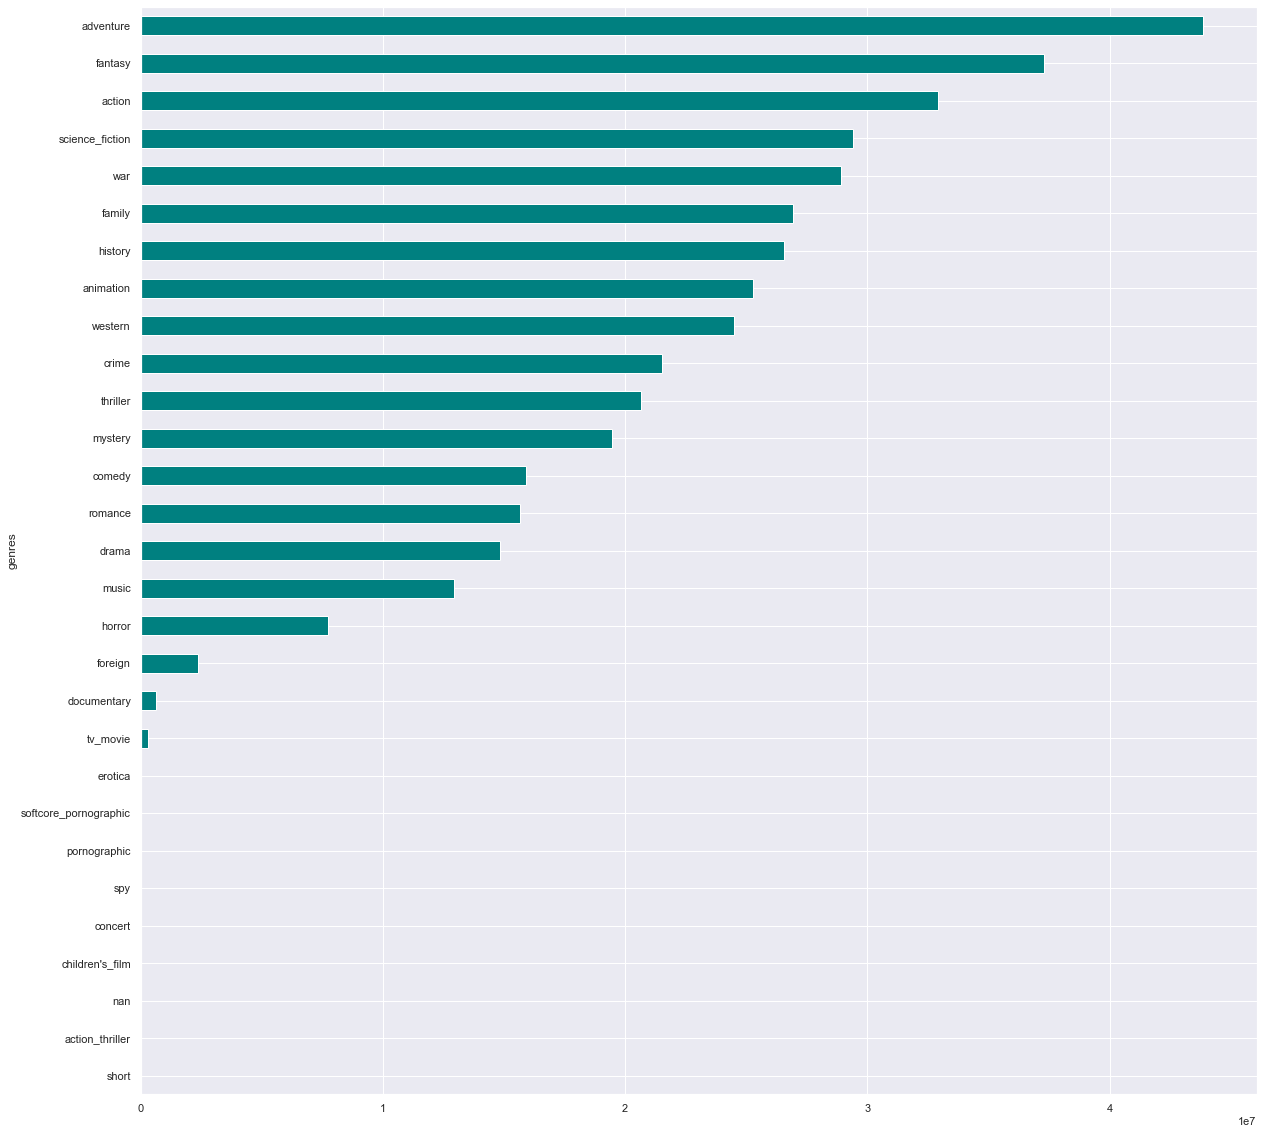

In [323]:
df_genres.groupby("genres")["budget"].mean().sort_values().plot.barh(figsize = (20,20), color = 'teal')

Question:

Which Genre has grossed more?

<AxesSubplot:ylabel='genres'>

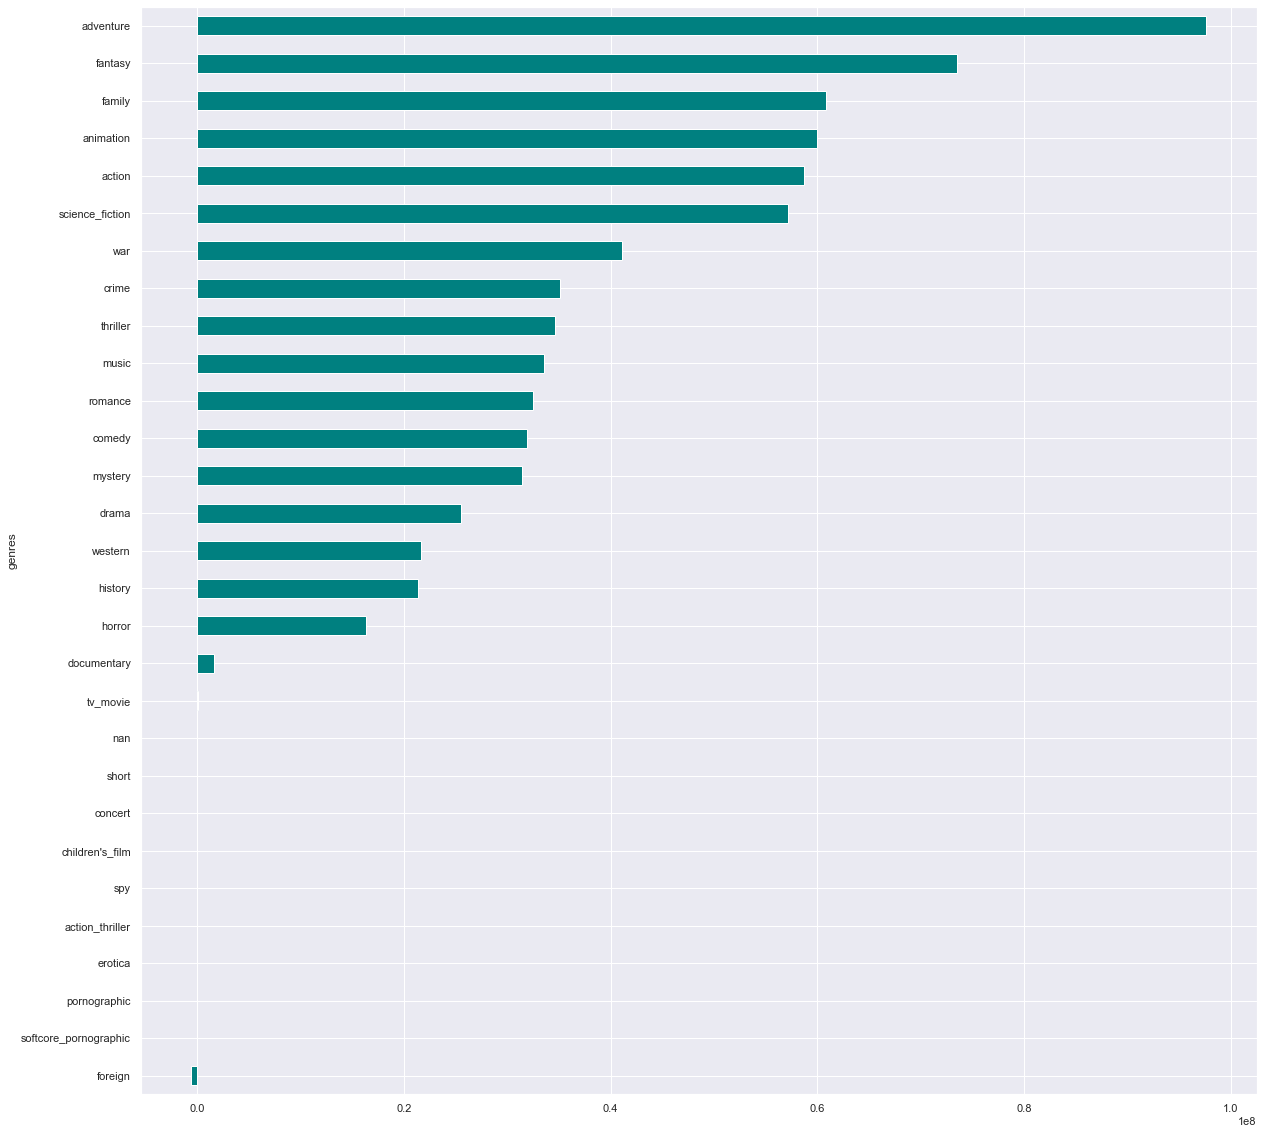

In [324]:
df_genres.groupby("genres")["grossing"].mean().sort_values().plot.barh(figsize = (20,20), color = 'teal')

In [87]:
runtime_df.median()

C:\Users\olanr\AppData\Local\Temp\ipykernel_18696\4071055299.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  runtime_df.median()


runtime       98.0
vote_count    33.0
runtime_z      0.0
dtype: float64

In [88]:
"""Genre
5.0 Most popular genre
5.1 Which genres make the most money
"""

'Genre\n5.0 Most popular genre\n5.1 Which genres make the most money\n'

<AxesSubplot:>

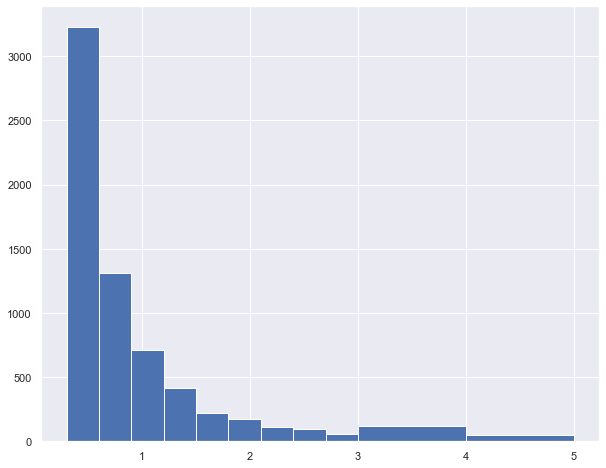

In [89]:
df["popularity"].hist(bins = [0.3, 0.6, 0.9, 1.2, 1.5, 1.8, 2.1, 2.4, 2.7, 3.0, 4.0, 5.0 ], figsize = (10, 8))

In [90]:
df["popularity"].mean()

0.6464409519602429

In [91]:
df["popularity"].median()

0.3838555

**Result**:

- There is a significant amount of movies that are not popular.

In [92]:
df_genres.groupby("genres")["popularity"].median().sort_values(ascending = False)[:10]

genres
adventure          0.560343
fantasy            0.527458
animation          0.501163
crime              0.476687
family             0.470249
action             0.469711
thriller           0.444337
science_fiction    0.437627
war                0.432470
mystery            0.428021
Name: popularity, dtype: float64

In [93]:
df_genres.groupby("genres")["revenue"].mean().sort_values(ascending = False)[:10]

genres
adventure          1.414829e+08
fantasy            1.108710e+08
action             9.160498e+07
family             8.773671e+07
science_fiction    8.655663e+07
animation          8.525613e+07
war                6.998611e+07
crime              5.659533e+07
thriller           5.524842e+07
mystery            5.088930e+07
Name: revenue, dtype: float64

In [94]:
"""Production Companies
6.0 Production companies and the quality of their movies.
6.2. Production companies that have made the most money through grossing.
"""

'Production Companies\n6.0 Production companies and the quality of their movies.\n6.2. Production companies that have made the most money through grossing.\n'

In [95]:
df_production_companies.groupby("production_companies")["vote_average"].mean().sort_values(ascending = False)[:20]

production_companies
emi                                                     8.7
smv_enterprises                                         8.7
red_bull_media_house                                    8.5
brain_farm_digital_cinema                               8.5
edel_records_gmbh                                       8.5
talking_heads                                           8.4
beanca_films                                            8.4
fondo_de_inversiã³n_y_estã­mulos_al_cine_(fidecine)     8.4
mpn_cologne_film_3                                      8.4
arnold_stiefel_company                                  8.4
rdf_media                                               8.3
banger_films                                            8.3
alfran_productions                                      8.3
ministã¨re_de_la_culture_de_la_republique_franã§aise    8.3
historia                                                8.3
les_films_aleph                                         8.3
msnbc_films        

<AxesSubplot:>

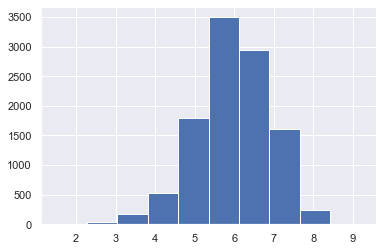

In [96]:
df["vote_average"].hist()

In [97]:
"""Bad rating
13. Which movies did IMDB critics get it wrong?
13.0: How vote average compares with revenue and popularity at the same time
"""

'Bad rating\n13. Which movies did IMDB critics get it wrong?\n13.0: How vote average compares with revenue and popularity at the same time\n'

In [98]:
#13. Which movies did IMDB critics get it wrong?

bad_rating = df[(df["vote_average"] < 7.0) & (df["popularity"] > df["popularity"].median()) & (df["revenue"] > df["revenue"].median())]

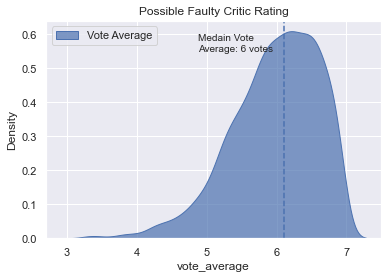

In [343]:
#13.0: How vote average compares with revenue and popularity at the same time
sns.kdeplot(bad_rating["vote_average"], alpha = 0.7, shade = True, label = "Vote Average")

plt.axvline(bad_rating["vote_average"].median(), linestyle = "dashed", linewidth = 1.5)
plt.text(bad_rating["vote_average"].median()*0.8, 0.55, 'Medain Vote \nAverage: {:.0f} votes'.format(bad_rating['vote_average'].median()))
#plt.figure(figsize= (10, 10))
plt.title("Possible Faulty Critic Rating")
plt.legend(loc = "upper left")
plt.show()

**Result**

We can see that generally, movies tend to be released more in the 2nd and 4th quarters of the year. This could be a reason why the revenue generated during these two periods is higher compared to the other quarters.

## Conclusions

### Summary ###

1. There is a positive correlation between movie Budget and popularity. This implies that a movie with a large budget could be quite popular but a causal relationship between the two variables cannot be firmly established at this time because correlation does not imply causation.<br>


2. The years 2009, 1997, and 1973 have the highest revenue and highest grossing.
<br>

3. Budgets for 2010, 2011, 2007, and 2006 were the largest, yet they are not in the top 10 years for revenue generated and highest grossing. This could imply that a large movie budget does not necessarily guarantee a large grossing or revenue, although this claim needs to be properly investigated.<br>
<br>
4. Movies tend to be released more in the 2nd and 4th quarters of the year according to the IMDB database, and this could be a reason why revenue generated is also the highest at those periods of the year


## Limitations ##

The limitations for this analysis are listed below:<br>
<br>
1. There were a number of missing values in the Director, Genre and Cast columns. The missing values in each column have been inputed with data gotten from manually researching and inputing the data. However, there are still a number of missing values in all 3 columns that have simply been inputted as unknown.<br><br>

2. There are only 10,000+ movies in the dataset. Thus, making generalizations such as "Number of movies for a particular year" might not be exactly representative of reality as many more movies not in this dataset have been produced in the same period of time.<br>

In [100]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

4294967295